# Problem Statement :

### To identify user behaviour patterns to effectively understand features that influence the conversion of customer's online browsing into purchase.

## Data Columns :

    Administrative	          Number of pages visited by the user for user account management related activities
    Administrative_Duration   Time spent on Admin pages by the user
    Informational	          Number of pages visited by the user about the website
    Informational_Duration    Time spent on Informational pages by the user
    ProductRelated	          Number of product related pages visited by the user 
    ProductRelated_Duration	  Time spent on Product related pages by the user
    BounceRates	              Average bounce rate of the pages visited by the user
    ExitRates	              Average exit rate of the pages visited by the user
    PageValues	              Average page value of the pages visited by the user
    SpecialDay	              Closeness of the visiting day to a special event,Ex: Mother’s Day,Christmas
    Month	                  Month of the visit from Jan to Dec
    OperatingSystems	      OperatingSystems of the visitor
    Browser	                  Browser of the visitor
    Region	                  Geographic region from which the session has been started by the visitor
    TrafficType	              Traffic source through which user has entered the website
    VisitorType	              Visitor type as New visitor, Returning user or Others
    Weekend	                  If the user visited on a weekend or not
    Revenue	                  If the user visit resulted with a transaction


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from math import factorial
from itertools import combinations

In [81]:
df=pd.read_csv('online_shoppers_intention.csv',header = 2)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 21 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
Unnamed: 18  

In [84]:
df.drop(['Unnamed: 18','Administrative.1','Unnamed: 20'], axis = 1, inplace = True)

In [85]:
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

#### Administrative

In [86]:
df['Administrative'].describe()

count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

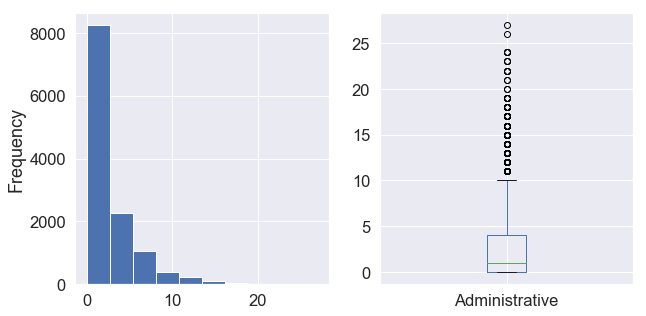

In [87]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
df['Administrative'].plot(kind='hist')
plt.subplot(1,2,2)
df['Administrative'].plot(kind='box')

plt.show()

* From the histogram graph we can see that most of the people(more than 50%) does not visit account management related pages(admin pages) or visits a minimal number of times.
* There are too many outlier values in the feature. In this particular scenario these values are valid and we can not remove these outliers or impute it.

#### Administrative_Duration

In [88]:
df['Administrative_Duration'].describe()

count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64

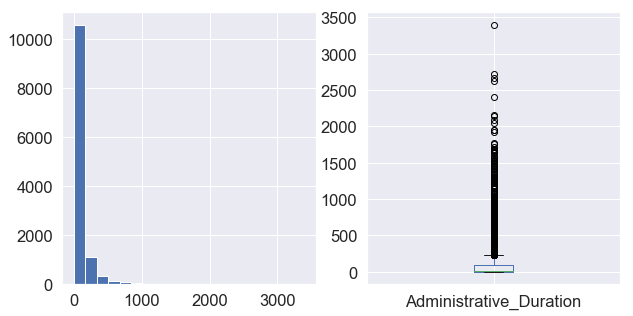

In [89]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.hist(df['Administrative_Duration'], bins = 20)
plt.subplot(1,2,2)
df['Administrative_Duration'].plot(kind = 'box')

plt.show()

* 75% people spend hardly 90 seconds on the administrative page.But there are some people who spend much more time in the administrative page. As we can see from the descriptive statistics of this column maximum time recorded was 3398. Standard deviation is also very high. Therefore the histogram is highly right skewed.
* There are too many outlier values in the feature. In this particular scenario these values are valid and we can not remove these outliers or impute it.

#### Informational

In [90]:
df['Informational'].describe()

count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64

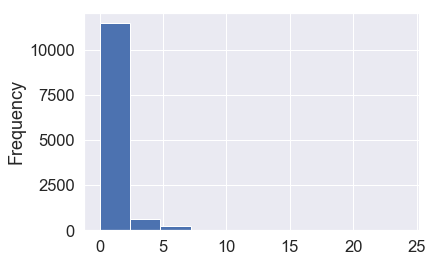

In [91]:
df['Informational'].plot(kind = 'hist')

As we can see from the histogram and also from the descriptive statistics 75% of users does not visit any informational pages about the website. But there are users who visits the informational pages more than 10. Maximum value recorded was 24.

#### Informational_Duration

In [92]:
df['Informational_Duration'].describe()

count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

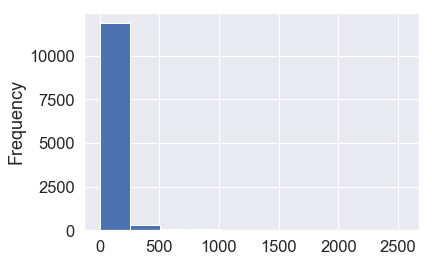

In [93]:
df['Informational_Duration'].plot(kind = 'hist')
plt.show()

From the 'Inormational' column statistics it is obvious that atleast 75% values of 'Informational_duration' will be 0. But some users spent too much time in the informational pages as high as 2549 seconds as we can see from the descriptive statistics. Std deviation is also very high making frequency distribution heavily right skewed.

#### ProductRelated

In [94]:
df['ProductRelated'].describe()

count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

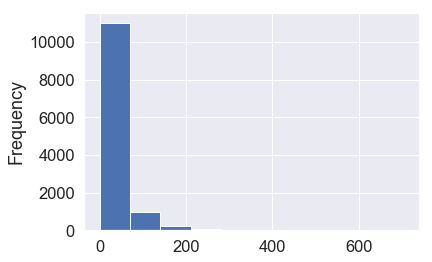

In [95]:
df['ProductRelated'].plot(kind='hist')
plt.show()

75% of users visit 38 or less product related pages. Remaining 25% users visits more  than 38(upto 705) and because of that distribution is heavily right skewed.

#### ProductRelated_Duration

In [96]:
df['ProductRelated_Duration'].describe()

count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157213
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

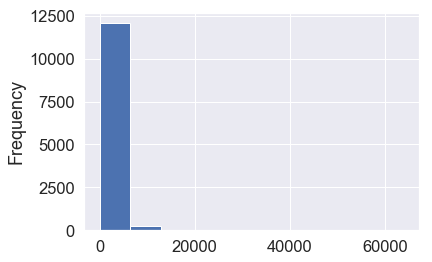

In [97]:
df['ProductRelated_Duration'].plot(kind='hist')
plt.show()

Average time spent on the product related pages by the users is 1195 seconds(almost 20 mins). 75% users spend 1464 seconds(almost 25mins). But there are users who has spent more than 25 mins upto 63973 seconds(nearly 18 hrs).

In [98]:
df['BounceRates'].describe()

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64

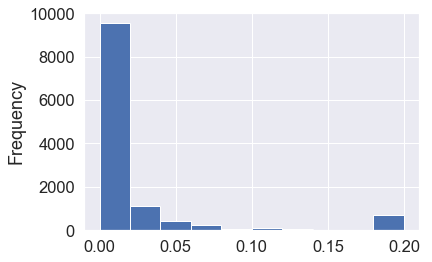

In [99]:
df['BounceRates'].plot(kind = 'hist')
plt.show()

Most of the pages(75%) visited by the users are are having bounce rate less than 2%. But there are pages visited by the users have bounce rate greater than that. We can also see a small peek arising in the histogram near 20% bounce rate.

#### ExitRates

In [100]:
df['ExitRates'].describe()

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

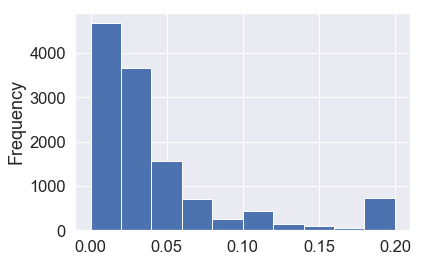

In [101]:
df['ExitRates'].plot(kind = 'hist')

From the statistics of the bounce rate it is obvious that most of the cases exit rate of the pages visited by the user will be higher. From the histogram itself we can see that exit rate is less peeked in the lower value side than the bounce rate(standard deviation is same in both the cases) and 75% of the pages visited by the users are having exit rate of 5%(higher than the bounce rate). Some pages are having bounce rate of 20% also. So, users are more likely using that web page they are entering.

#### PageValues : Average page value of pages visited by the users

In [102]:
df['PageValues'].describe()

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

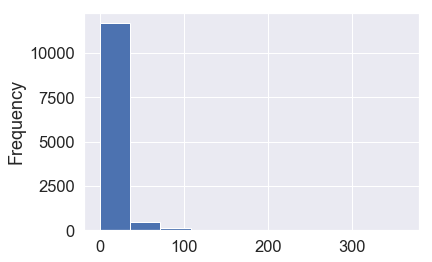

In [103]:
df['PageValues'].plot(kind = 'hist')
plt.show()

Page Value is the average value for a page that a user visited before landing on a goal page or completing an E-commerce transaction(or both).In other words, Page value helps you to understand which pages on your website helping you to drive more conversions and revenue.


#### SpecialDay : Closeness to a special day

In [104]:
df['SpecialDay'].describe()

count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

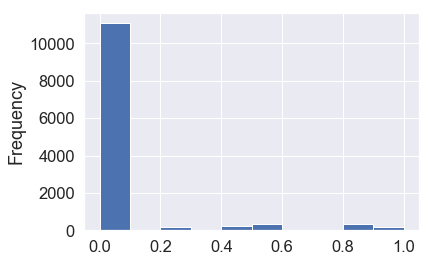

In [105]:
df['SpecialDay'].plot(kind = 'hist')

More than 75% values are 0. So the users' visit to the website is very less close to any special day.

In [106]:
# Number of visits that are close to any special day
df[df['SpecialDay']>=0.2].shape[0]

1251

In [107]:
df[df['SpecialDay']>=0.2]['Month'].value_counts()

May    1172
Feb      79
Name: Month, dtype: int64

Most of the visits which were close to special day was in May (1172 visits, special day may be Mothers' day) and February(79 visits, may be valentines day). So according to the data there is only special days in May and February

#### Month

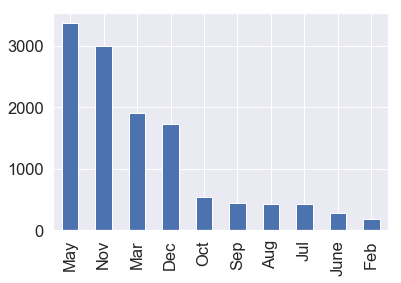

In [108]:
df['Month'].value_counts().plot(kind = 'bar')

From the barplot we can see Maximum visits are in the month of May and November. Then there are March and December. Then there are fewer visits(<=500) in Month of February, June, July, August, September, October. January and April has no visits at all.

#### OperatingSystems

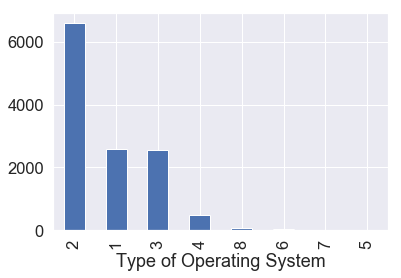

In [109]:
df['OperatingSystems'].value_counts().plot(kind = 'bar')
plt.xlabel('Type of Operating System')
plt.show()

In [110]:
df['OperatingSystems'].value_counts().div(12330, axis = 0)

2    0.535361
1    0.209651
3    0.207218
4    0.038767
8    0.006407
6    0.001541
7    0.000568
5    0.000487
Name: OperatingSystems, dtype: float64

Maximum number(>6500, almost 54%) visits were done using 2nd type of operating system.20% is for each of operating system of type 1 and 3. Usage of others operating system are comparatively very less.

#### TrafficType : Traffic Source through which user has entered the website

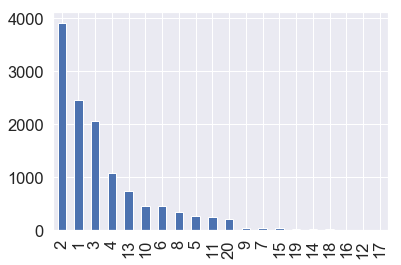

In [111]:
df['TrafficType'].value_counts().plot(kind = 'bar')
plt.show()

In total 19 types of Traffic Source is there. Most of the cases traffic source was type 2,1,3. And the traffic source of type 7,9,12,14,15,17,19 were very less in number.

#### VisitorType

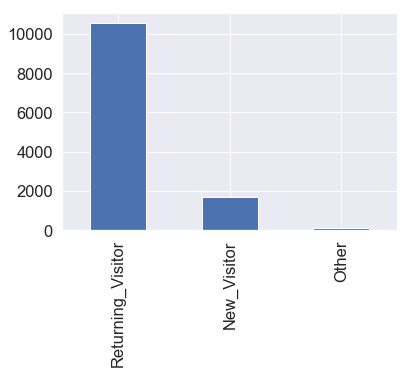

In [112]:
df['VisitorType'].value_counts().plot(kind = 'bar')
plt.show()

In [113]:
df['VisitorType'].value_counts().div(12330, axis = 0)

Returning_Visitor    0.855718
New_Visitor          0.137388
Other                0.006894
Name: VisitorType, dtype: float64

Most of the visitors are Returning visitor(85%). New visitors 13% and 0.7% vistors are Others type

#### Weekend

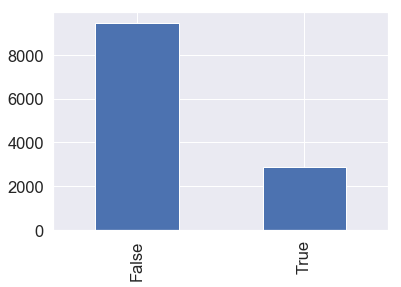

In [114]:
df['Weekend'].value_counts().plot(kind = 'bar')
plt.show()

No of visits in the Weekend is very less.

#### Revenue

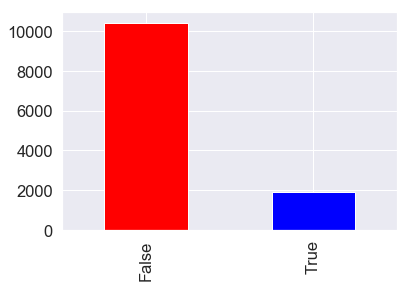

In [115]:
df['Revenue'].value_counts().plot(kind= 'bar', color=['Red','Blue'])
plt.show()

In [116]:
df['Revenue'].value_counts().div(12330, axis = 0)

False    0.845255
True     0.154745
Name: Revenue, dtype: float64

Out of the total visits  recorded only 15% was converted into successfull transaction. Most of the cases visit was not successful

#### Administrative Vs Administrative_Duration

<Figure size 720x432 with 0 Axes>

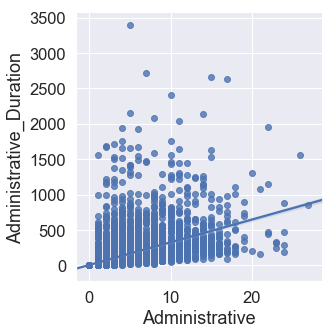

In [164]:

sns.lmplot(x='Administrative', y = 'Administrative_Duration', data = df)

plt.show()

looks like there is a positive correlation between Administrative and Administrative_Duration. Data points are more dense between 0-15 of administrative variable and 0-1000 of administrative_duration variable.

#### Informational Vs Informational_Duration

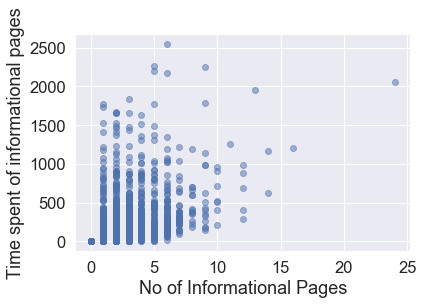

In [118]:
plt.scatter(df['Informational'], df['Informational_Duration'], alpha = 0.5)
plt.xlabel('No of Informational Pages')
plt.ylabel('Time spent of informational pages')
plt.show()

There is a positive correlation between Informational and Informational Duration. Data points are more dense at 0-500 of Informational_Duration and 0-6 at Informational variable.

#### ProductRelated vs ProductRelated_Duration

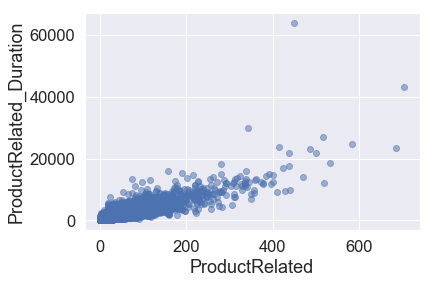

In [119]:
plt.scatter(df['ProductRelated'], df['ProductRelated_Duration'], alpha = 0.5)
plt.xlabel('ProductRelated')
plt.ylabel('ProductRelated_Duration')
plt.show()

There is a strong positive correlatioship between ProductRelated_Duration and ProductRelated.

#### BounceRate vs ExitRate

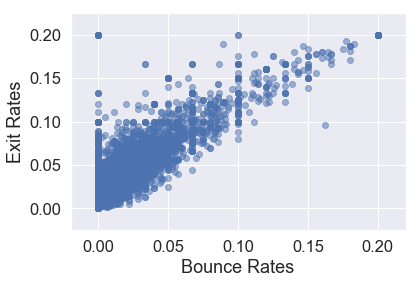

In [120]:
plt.scatter(df['BounceRates'], df['ExitRates'], alpha = 0.5)
plt.xlabel('Bounce Rates')
plt.ylabel('Exit Rates')
plt.show()

Strong positive correlation between bounce rates and exit rates. So as the average bounce rate of pages visited by the user increases average also increases.

#### ExitRates vs PageValues

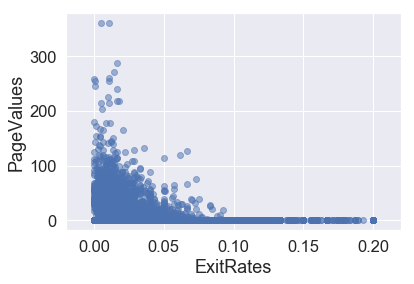

In [121]:
plt.scatter(df['ExitRates'], df['PageValues'], alpha = 0.5)
plt.xlabel('ExitRates')
plt.ylabel('PageValues')
plt.show()

Looks like strength of the  correlation between PageValues and Exitrates is very weak and negative. Change in Exitrate/PageValues does not affect much in change of PageValues/ExitRates.

#### BounceRates vs PageValues

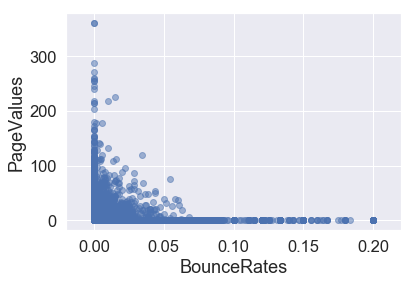

In [122]:
plt.scatter(df['BounceRates'], df['PageValues'], alpha=0.5)
plt.xlabel('BounceRates')
plt.ylabel('PageValues')
plt.show()

There is a very  weak negative correlation between PageValues and BounceRates. Bounce rate does not affect much the pagevalues.

#### Weekend vs Revenue

In [123]:
t = pd.crosstab(df['Revenue'], df['Weekend']).sum(axis = 0)
t

Weekend
False    9462
True     2868
dtype: int64

In [124]:
pd.crosstab(df['Revenue'], df['Weekend']).div(t, axis = 1)

Weekend     False     True 
Revenue                    
False    0.851089  0.826011
True     0.148911  0.173989

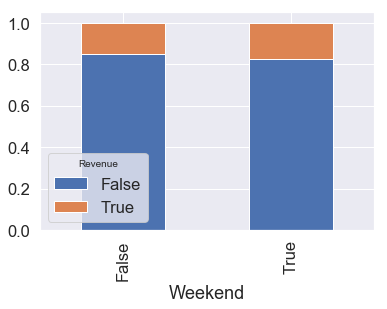

In [125]:
pd.crosstab(df['Revenue'], df['Weekend']).div(t, axis = 1).T.plot(kind = 'bar', stacked = True)

Proportion of Weekend visits converted into Revenue(17%) and proportion of weekdays visits converted into revenue(14%) is almost same. Weekend feature may not be much useful for predicting the target variable(Revenue).

#### VisitorType vs Revenue

In [126]:
revenue_visitor = pd.crosstab(df['VisitorType'], df['Revenue'])
revenue_visitor

Revenue            False  True 
VisitorType                    
New_Visitor         1272    422
Other                 69     16
Returning_Visitor   9081   1470

In [127]:
t = pd.crosstab(df['VisitorType'], df['Revenue']).sum(axis = 1)
t

VisitorType
New_Visitor           1694
Other                   85
Returning_Visitor    10551
dtype: int64

Revenue               False     True 
VisitorType                          
New_Visitor        0.750885  0.249115
Other              0.811765  0.188235
Returning_Visitor  0.860677  0.139323


(0.2, 1)

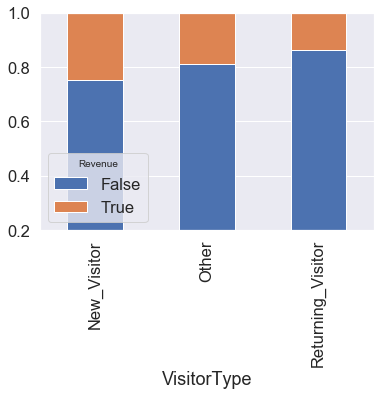

In [128]:
print(revenue_visitor.div(t,axis = 0))
revenue_visitor.div(t,axis = 0).plot(kind = 'bar', stacked = True)
plt.ylim(0.2,1)

from the stacked bar we can see that there is a significant difference between proportion of different type of visitor converting into successful revenue. For the new_visitor type this proportion(~25%) is higher than other visitor types. For the Returning visitor type this proportion is less(~14%) and for other type visitor this proportion is somewhere between(almost 19


From the proportion analysis we can say visitor_type variable will be useful for predicting the target variable revenue.

#### Month Vs Revenue

In [129]:
month_revenue = pd.crosstab(df['Month'], df['Revenue'])
month_revenue

Revenue  False  True 
Month                
Aug        357     76
Dec       1511    216
Feb        181      3
Jul        366     66
June       259     29
Mar       1715    192
May       2999    365
Nov       2238    760
Oct        434    115
Sep        362     86

In [130]:
month_revenue_sum = month_revenue.sum(axis = 1)
month_revenue_sum

Month
Aug      433
Dec     1727
Feb      184
Jul      432
June     288
Mar     1907
May     3364
Nov     2998
Oct      549
Sep      448
dtype: int64

Revenue     False     True 
Month                      
Aug      0.824480  0.175520
Dec      0.874928  0.125072
Feb      0.983696  0.016304
Jul      0.847222  0.152778
June     0.899306  0.100694
Mar      0.899318  0.100682
May      0.891498  0.108502
Nov      0.746498  0.253502
Oct      0.790528  0.209472
Sep      0.808036  0.191964


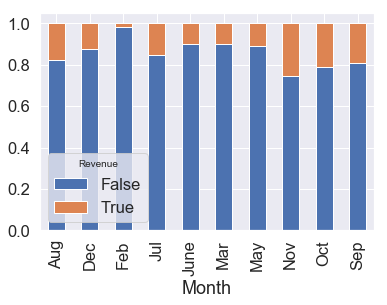

In [131]:
print(month_revenue.div(month_revenue_sum, axis = 0))
month_revenue.div(month_revenue_sum, axis = 0).plot(kind = 'bar', stacked = True)

* We can see 25% of the visits in November was converted into Revenue which is highest among all the months.
* In February very less no of visits(~2%) were converted into Revenue.
* Others are varying from 10-20%.
* So looks like month has a effect on the target variable,Revenue.

#### Administrative vs Revenue

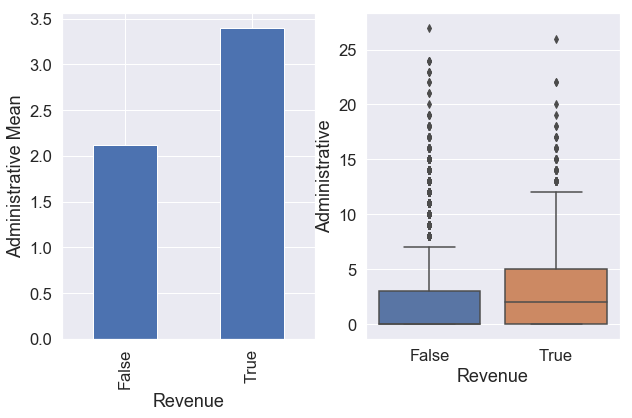

In [132]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
df.groupby('Revenue').mean()['Administrative'].plot(kind = 'bar')
plt.ylabel('Administrative Mean')
plt.subplot(1,2,2)
sns.boxplot(x = 'Revenue', y = 'Administrative', data = df)

* From the bar graph we can say mean for the Administrative feature is significantly different. For True Revenue it is higher than False Revenue.
* from the side by side boxplot we can see median for the True Revenue is higher than the False Revenue. And variability is also more for True Revenue.


Visitors who actually buy some product from the website generally visits more number of administrative pages.
* So we can say Administrative can be useful for predicting Revenue .

#### Administrative_Duration vs Revenue

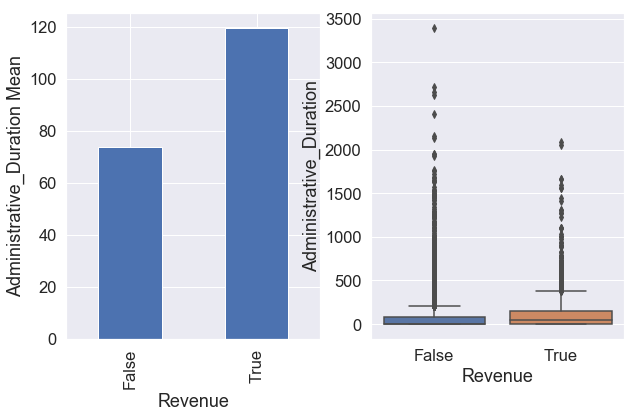

In [133]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
df.groupby('Revenue').mean()['Administrative_Duration'].plot(kind = 'bar')
plt.ylabel('Administrative_Duration Mean')
plt.subplot(1,2,2)
sns.boxplot(x = 'Revenue', y = 'Administrative_Duration', data = df)

In [134]:
df.groupby('Revenue').median()['Administrative_Duration']

Revenue
False     0.000000
True     52.366667
Name: Administrative_Duration, dtype: float64

* There is a significant difference in Administrative_Mean for two Revenue category. 
* variability of Administrative_Duration is slightly higher in case of True Revenue and also median is  higher.


#### Informational vs Revenue

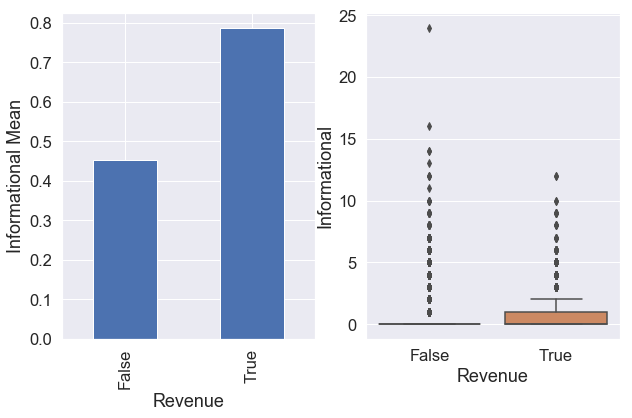

In [135]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
df.groupby('Revenue').mean()['Informational'].plot(kind = 'bar')
plt.ylabel('Informational Mean')
plt.subplot(1,2,2)
sns.boxplot(x = 'Revenue', y = 'Informational', data = df)

Informational Mean is different for different types of revenue catregory.But Median is same for both the case and variation is also not significantly different.

In [136]:
df.groupby('Revenue').median()['Informational']

Revenue
False    0
True     0
Name: Informational, dtype: int64

#### Informational_duration vs Revenue

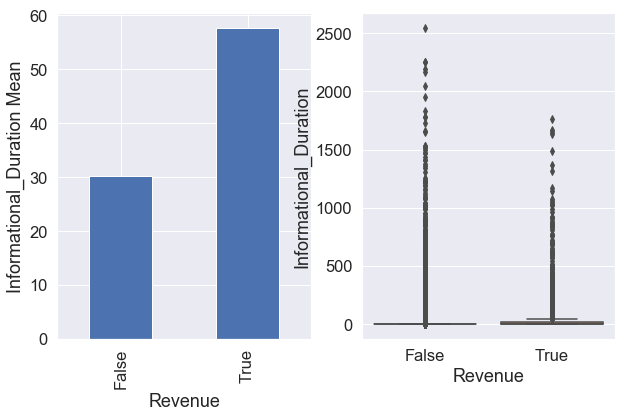

In [137]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
df.groupby('Revenue').mean()['Informational_Duration'].plot(kind = 'bar')
plt.ylabel('Informational_Duration Mean')
plt.subplot(1,2,2)
sns.boxplot(x = 'Revenue', y = 'Informational_Duration', data = df)
plt.show()

* Informational_Duration Mean is significantly different for different Revenue Category.
* for False Revenue maximum Informational_Duration value is 0 as we can see from the boxplot. But there are too many outliers. Variability in Informational_duration is higher in case of True Revenue

In [138]:
df.groupby('Revenue').std()['Informational_Duration']

Revenue
False    133.909306
True     171.619131
Name: Informational_Duration, dtype: float64

Standard deviationin both the cases is very high.

#### ProductRelated vs Revenue

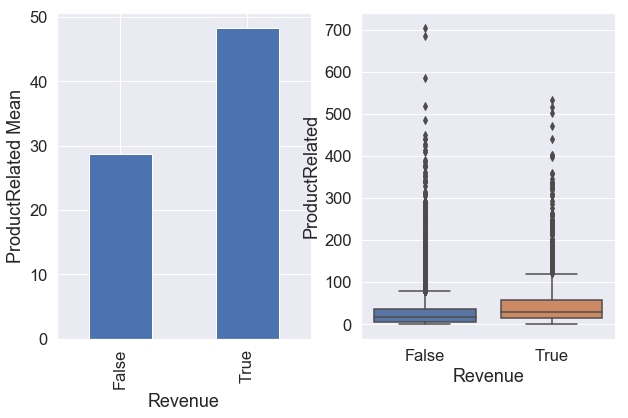

In [139]:
plt.figure(figsize = (10,6))
plt.subplot(1,2,1)
df.groupby('Revenue').mean()['ProductRelated'].plot(kind = 'bar')
plt.ylabel('ProductRelated Mean')
plt.subplot(1,2,2)
sns.boxplot(x = 'Revenue', y = 'ProductRelated', data = df)
plt.show()

* ProductRelated Mean is high for True Revenue category, so on average number of Product Related pages visited by customer who actually convert it to revenue is higher than the False Revenue category.
* Median value of ProductRelated is higher in case of True revenue Category and variatiion of values is also higher in case of True Revenue Category.

#### ProductRelated_Duration vs Revenue

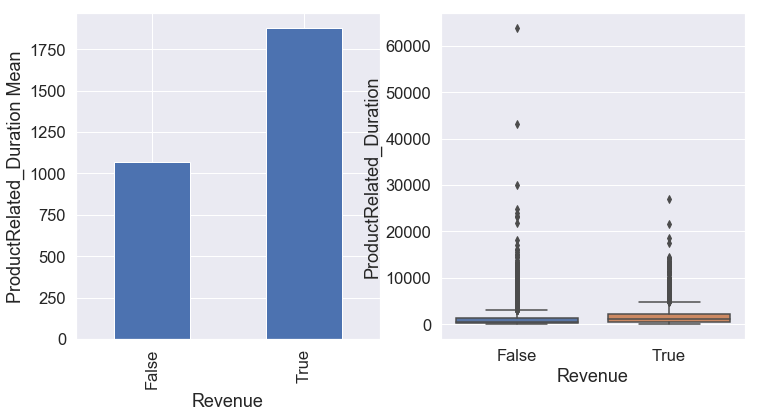

In [140]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
df.groupby('Revenue').mean()['ProductRelated_Duration'].plot(kind = 'bar')
plt.ylabel('ProductRelated_Duration Mean')
plt.subplot(1,2,2)
sns.boxplot(x = 'Revenue', y = 'ProductRelated_Duration', data = df)
plt.show()

#### BounceRates vs Revenue

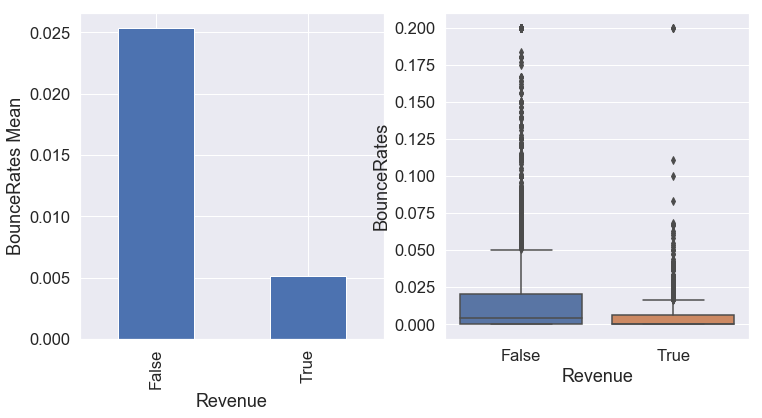

In [141]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
df.groupby('Revenue').mean()['BounceRates'].plot(kind = 'bar')
plt.ylabel('BounceRates Mean')
plt.subplot(1,2,2)
sns.boxplot(x = 'Revenue', y = 'BounceRates', data = df)
plt.show()

BounceRates Mean for True Revenue category is much lesser than the False Revenue Category. Median and variability of BounceRates is also less for true category of Revenue. So we can say Average bouncerate of pages visited by a user who convert the visit in revenue is less and for False revenue category it is high.

So we can use this variable for prediction of target variable.

#### ExitRates vs Revenue

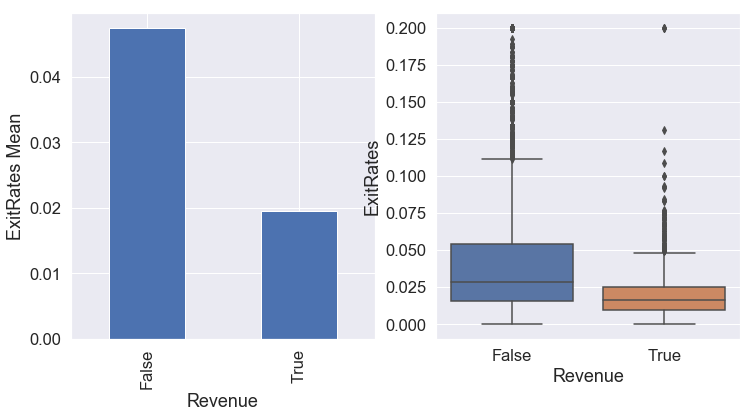

In [142]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
df.groupby('Revenue').mean()['ExitRates'].plot(kind = 'bar')
plt.ylabel('ExitRates Mean')
plt.subplot(1,2,2)
sns.boxplot(x = 'Revenue', y = 'ExitRates', data = df)
plt.show()

Mean ExitRates for True Revenue Category is lesser than the False Revenue Category. Also median and variability for false revenue category is higher than the True Revenue category. There is a significant difference in mean , median for both the group. So we may consider ExitRates for revenue predction.

In [143]:
df.groupby('Revenue').std()['ExitRates']

Revenue
False    0.051231
True     0.016463
Name: ExitRates, dtype: float64

#### PageValues vs Revenue

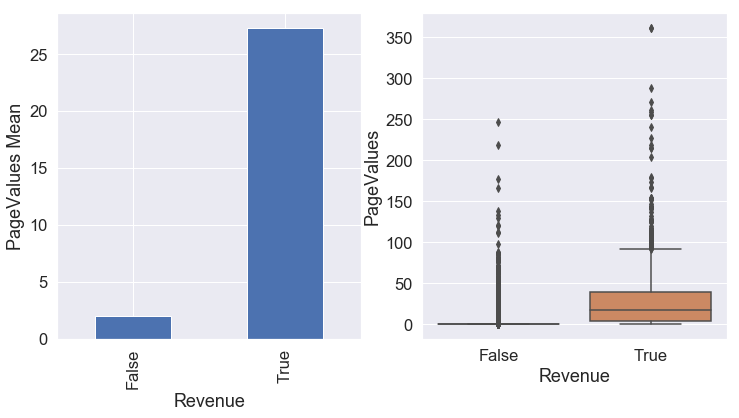

In [144]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
df.groupby('Revenue').mean()['PageValues'].plot(kind = 'bar')
plt.ylabel('PageValues Mean')
plt.subplot(1,2,2)
sns.boxplot(x = 'Revenue', y = 'PageValues', data = df)
plt.show()

Average and Page Values of the pages visited by the users who convert the visit into revenue is generally higher and for False revenue category is less. This could be a useful variable for prediction of the target variable.

#### Revenue vs Operating System

In [145]:
os_revenue = pd.crosstab(df['OperatingSystems'], df['Revenue'])
os_revenue

Revenue           False  True 
OperatingSystems              
1                  2206    379
2                  5446   1155
3                  2287    268
4                   393     85
5                     5      1
6                    17      2
7                     6      1
8                    62     17

In [146]:
os_rev_sum = os_revenue.sum(axis = 1)
os_rev_sum

OperatingSystems
1    2585
2    6601
3    2555
4     478
5       6
6      19
7       7
8      79
dtype: int64

Revenue              False     True 
OperatingSystems                    
1                 0.853385  0.146615
2                 0.825027  0.174973
3                 0.895108  0.104892
4                 0.822176  0.177824
5                 0.833333  0.166667
6                 0.894737  0.105263
7                 0.857143  0.142857
8                 0.784810  0.215190


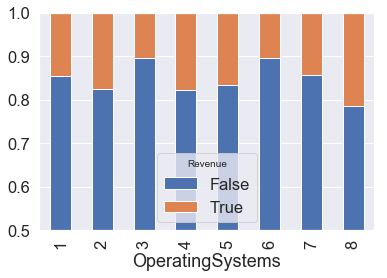

In [147]:
print(os_revenue.div(os_rev_sum, axis = 0))
os_revenue.div(os_rev_sum, axis = 0).plot(kind = 'bar', stacked = True)
plt.ylim(0.5,1)
plt.show()

From the stacked bar we can see that there is a significant difference in proportions of different operating system users converting the visit into revenue.

Operating system may be useful for prediction.

#### Region vs Revenue

In [148]:
region_revenue = pd.crosstab(df['Region'], df['Revenue'])
region_revenue

Revenue  False  True 
Region               
1         4009    771
2          948    188
3         2054    349
4         1007    175
5          266     52
6          693    112
7          642    119
8          378     56
9          425     86

In [149]:
reg_rev_sum = region_revenue.sum(axis = 1)
reg_rev_sum

Region
1    4780
2    1136
3    2403
4    1182
5     318
6     805
7     761
8     434
9     511
dtype: int64

Revenue     False     True 
Region                     
1        0.838703  0.161297
2        0.834507  0.165493
3        0.854765  0.145235
4        0.851946  0.148054
5        0.836478  0.163522
6        0.860870  0.139130
7        0.843627  0.156373
8        0.870968  0.129032
9        0.831703  0.168297


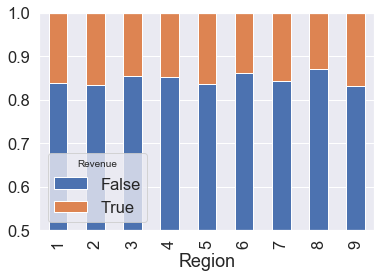

In [150]:
print(region_revenue.div(reg_rev_sum, axis = 0))
region_revenue.div(reg_rev_sum, axis = 0).plot(kind = 'bar', stacked = True)
plt.ylim(0.5,1)
plt.show()

From the stacked bar graph we can see that the proportions of Different region users converting the visit to the website in the revenue is almost same in all the cases. So Region may not be effecting Revenue. So Region may not be a useful feature for prediction of Revenue.

#### VisitorType vs TrafficType

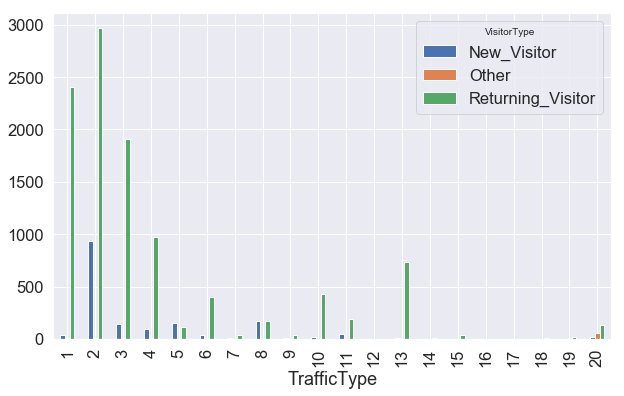

In [151]:
pd.crosstab(df['TrafficType'], df['VisitorType']).plot(kind = 'bar', figsize = (10,6))
plt.show()

<Figure size 720x432 with 0 Axes>

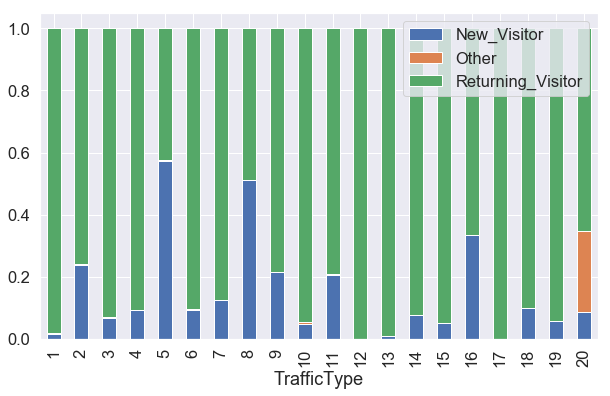

In [152]:
plt.figure(figsize = (10,6))
pd.crosstab(df['TrafficType'], df['VisitorType']).div(pd.crosstab(df['TrafficType'], df['VisitorType']).sum(axis = 1), axis = 0).plot(kind = 'bar', stacked = True, figsize = (10,6))
plt.legend(loc = 'upper right')

* Returning type visitors almost uses all the traffic source in high  proprtion than other visitor types.
* For New visitors mostly the trafficSource is of type 5, 8, 16.
* Other type visitor only have used type 20 traffic source.
* There is a huge differnce in difference in proportion of different visitor type through out different traffic sources

VisitorType  New_Visitor  Other  Returning_Visitor
Region                                            
1                  605.0  135.0             1385.0
2                  607.0   27.0             1276.0
3                  711.0   40.0             1264.0
4                  589.0  303.0             1188.0
5                  627.0    NaN             1245.0
6                  608.0  134.0             1112.0
7                  664.0   65.0             1218.0
8                  720.0  396.0             1175.0
9                  672.0  814.0             1281.0


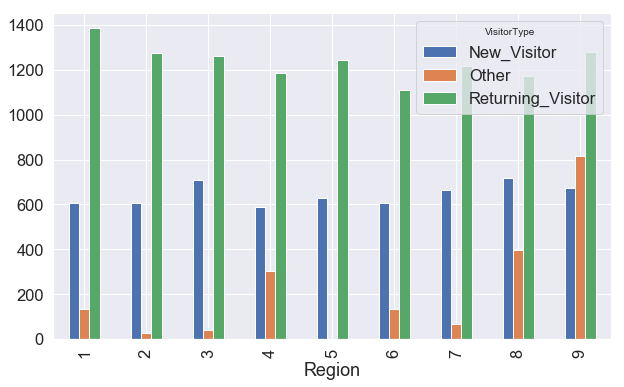

In [153]:
Table1 = pd.crosstab(df.Region, df.VisitorType, values = df.ProductRelated_Duration, aggfunc='mean').round(0)
print(Table1)
Table1.plot(kind = 'bar', figsize = (10,6))

Average time spent by the Returning visitors are normally higher than the other visitor type in all 9 regions, for New_visitor type it is less than the returning type, for Other typr visitor it is normally less than the previous two type  but in case of Region 9 only average time spent by the Other type visitor is higher than New_visitor.


We can see there is huge difference in average time spent by 'Other' visitor_type on product related pages from different regions. In region 9 the average time spent by the other visitor type user is very high compared to the other regions.


#### ProductRelatedDuration by Region and Revenue

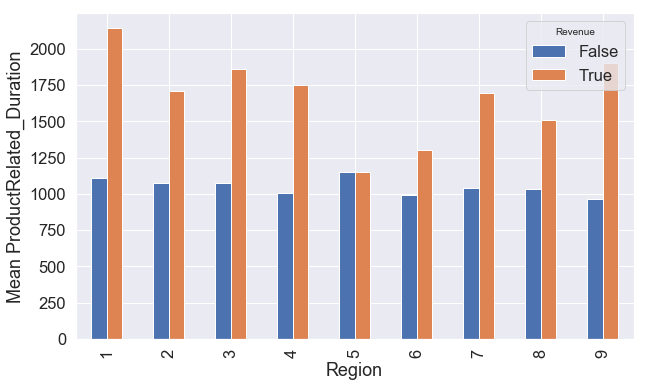

In [154]:
pd.crosstab(df.Region, df.Revenue, values = df['ProductRelated_Duration'], aggfunc='mean').plot(kind= 'bar', figsize = (10,6))
plt.ylabel('Mean ProductRelated_Duration')
plt.show()

As we can see customers who actually buy products from the website spent more time on Product Related Pages for all the regions. Except Region 5 where time spent on product related pages by both revenue and non-revenue type customers is almost same

#### Bouncerate by weekend and revenue

<Figure size 720x720 with 0 Axes>

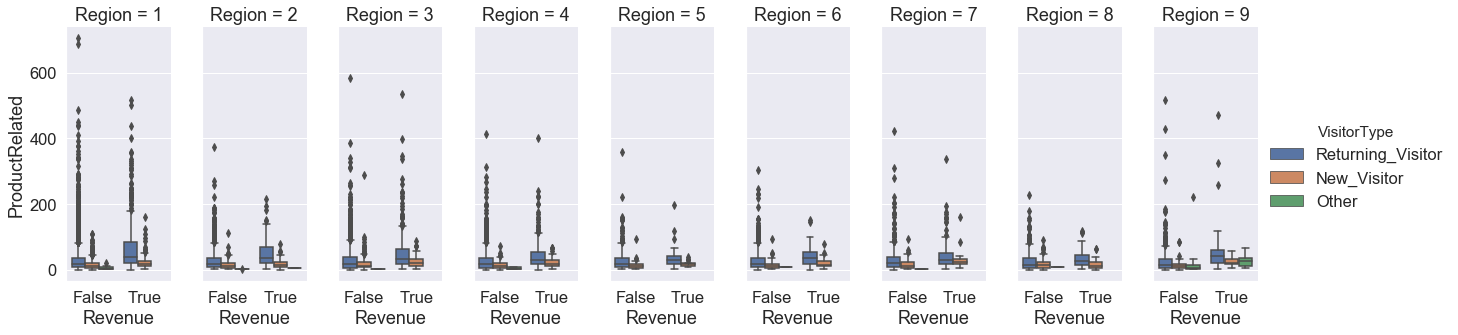

<Figure size 720x720 with 0 Axes>

In [155]:
df["ProductRelated"] = df["ProductRelated"].astype('int64')
plt.figure(figsize=(10,10))
sns.set(font_scale = 1.5) # Scale of the font is set 1.5 times the default size

sns.catplot(x = "Revenue", y = "ProductRelated", col = 'Region', hue = "VisitorType", aspect = 0.40, data = df, kind = "box")
plt.figure(figsize=(10,10))
plt.show()

In [199]:
# Getting all the numerical columns and making different combinations
numerical_cols = []
for i in df.columns:
    if i in ['Browser','Region','TrafficType','OperatingSystems']:
        continue
    if (df[i].dtype =='int64') or (df[i].dtype =='float64'):
        numerical_cols.append(i)
print(numerical_cols)
comb = factorial(len(numerical_cols))/(factorial(2)* factorial(len(numerical_cols)-2))
print('No of Combinations : ', comb)


['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
No of Combinations :  45.0


#### Two Numerical columns by Revenue

<Figure size 720x432 with 0 Axes>

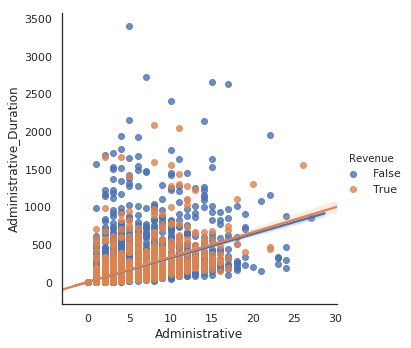

<Figure size 720x432 with 0 Axes>

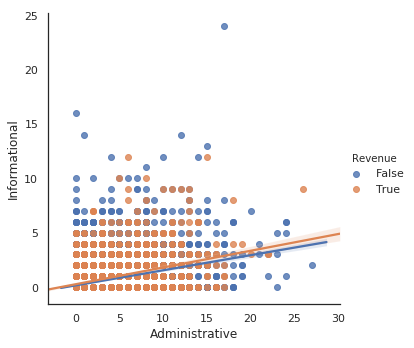

<Figure size 720x432 with 0 Axes>

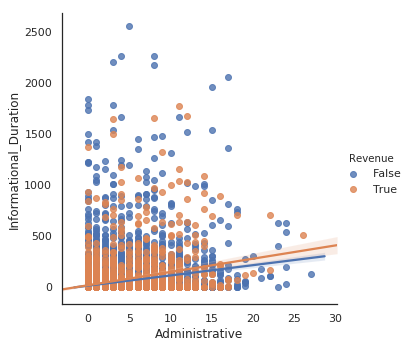

<Figure size 720x432 with 0 Axes>

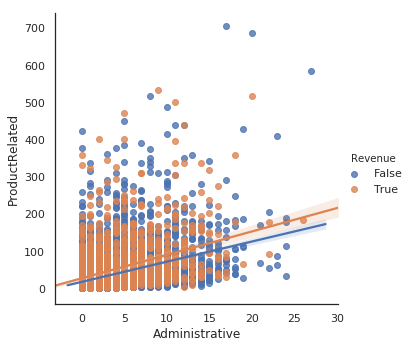

<Figure size 720x432 with 0 Axes>

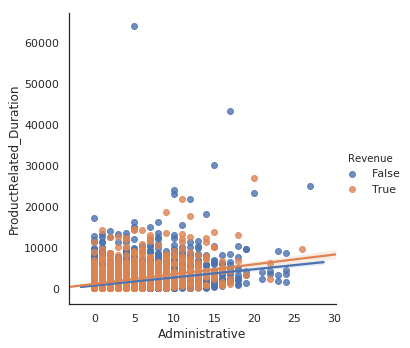

<Figure size 720x432 with 0 Axes>

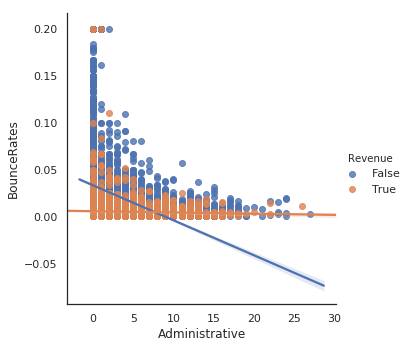

<Figure size 720x432 with 0 Axes>

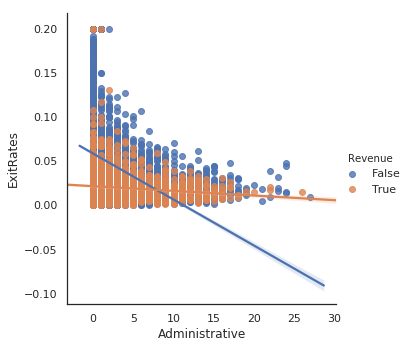

<Figure size 720x432 with 0 Axes>

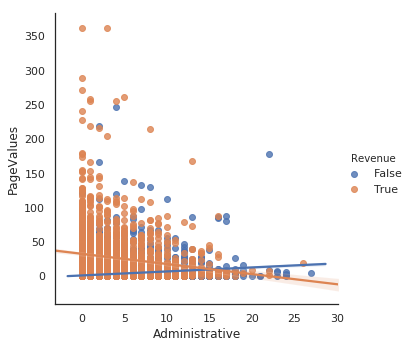

<Figure size 720x432 with 0 Axes>

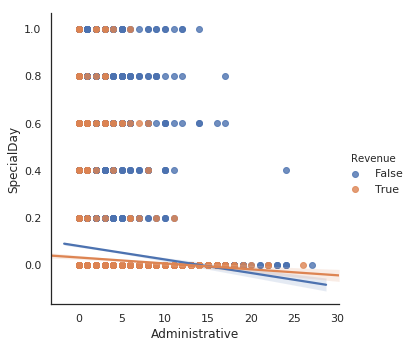

<Figure size 720x432 with 0 Axes>

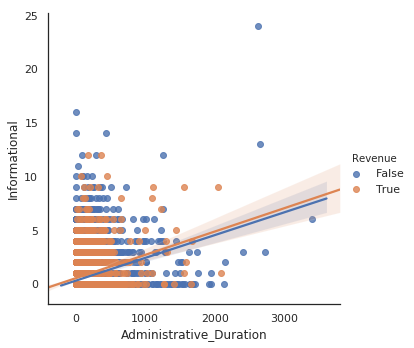

<Figure size 720x432 with 0 Axes>

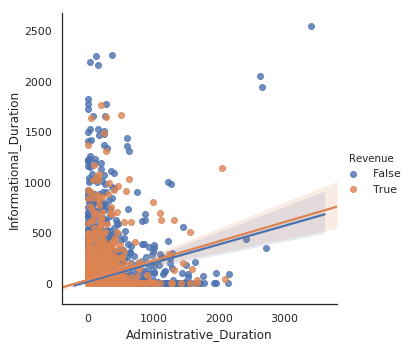

<Figure size 720x432 with 0 Axes>

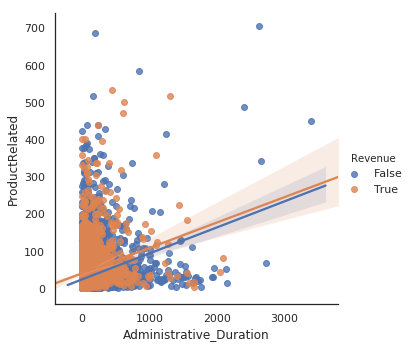

<Figure size 720x432 with 0 Axes>

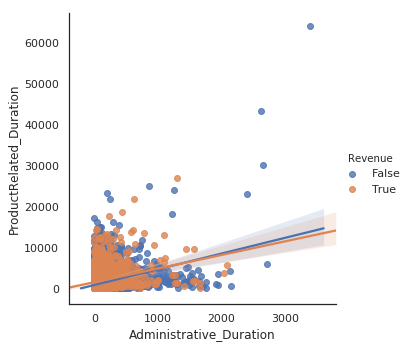

<Figure size 720x432 with 0 Axes>

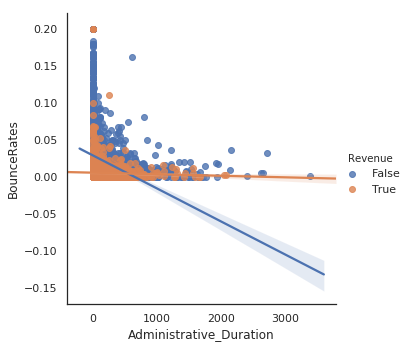

<Figure size 720x432 with 0 Axes>

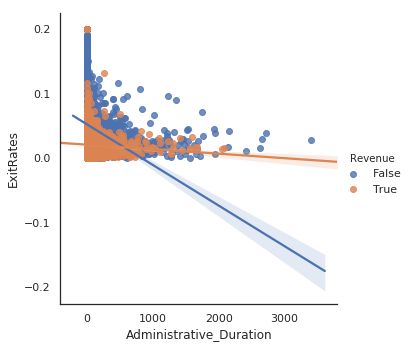

<Figure size 720x432 with 0 Axes>

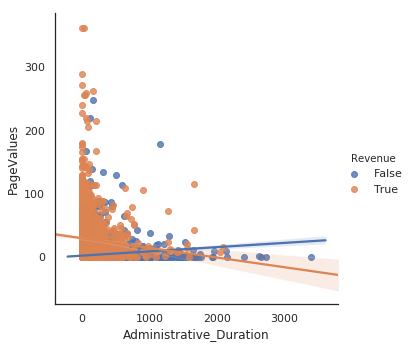

<Figure size 720x432 with 0 Axes>

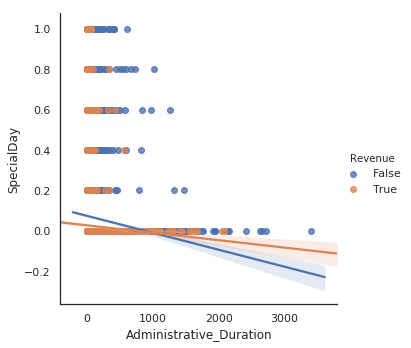

<Figure size 720x432 with 0 Axes>

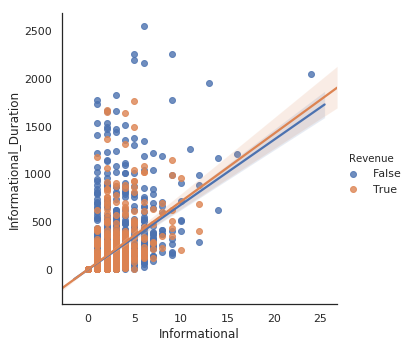

<Figure size 720x432 with 0 Axes>

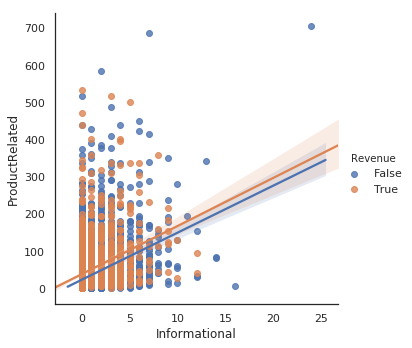

<Figure size 720x432 with 0 Axes>

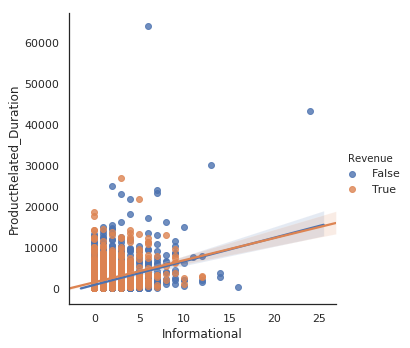

<Figure size 720x432 with 0 Axes>

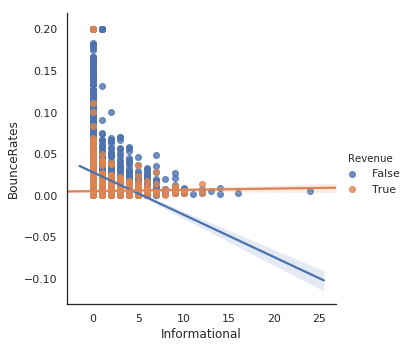

<Figure size 720x432 with 0 Axes>

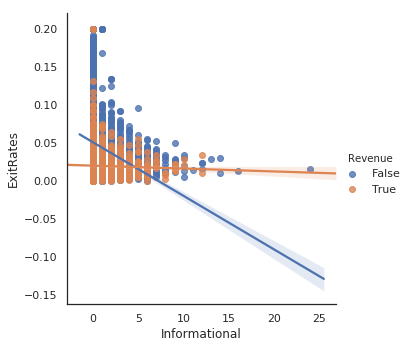

<Figure size 720x432 with 0 Axes>

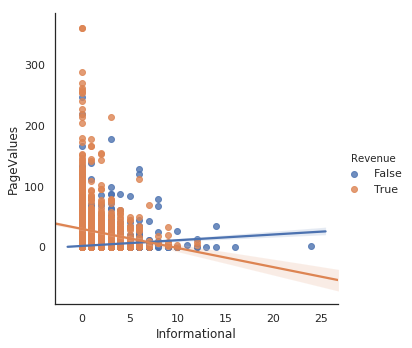

<Figure size 720x432 with 0 Axes>

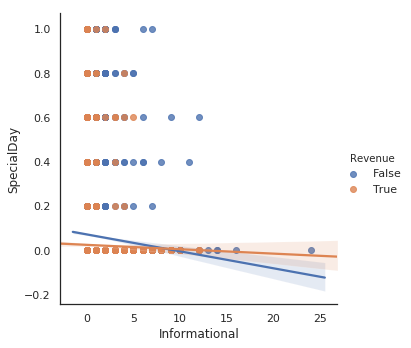

<Figure size 720x432 with 0 Axes>

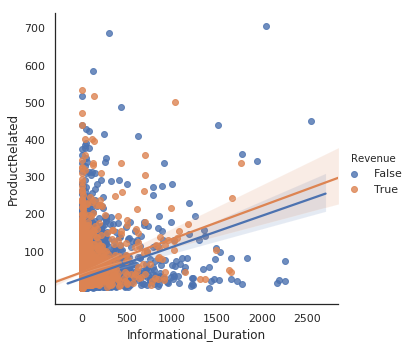

<Figure size 720x432 with 0 Axes>

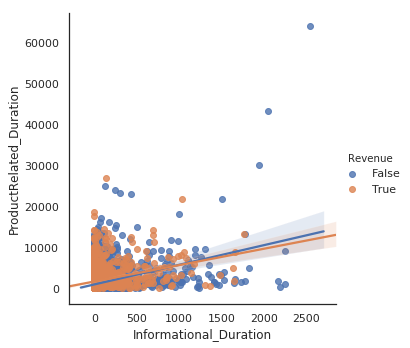

<Figure size 720x432 with 0 Axes>

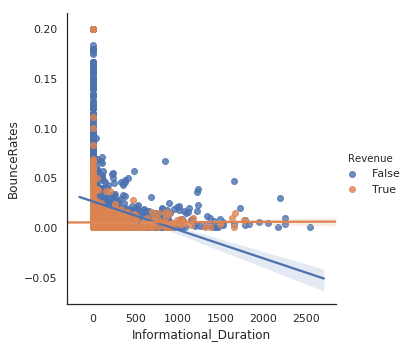

<Figure size 720x432 with 0 Axes>

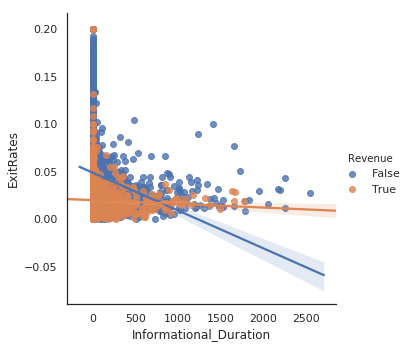

<Figure size 720x432 with 0 Axes>

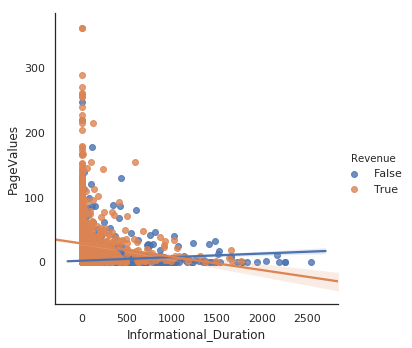

<Figure size 720x432 with 0 Axes>

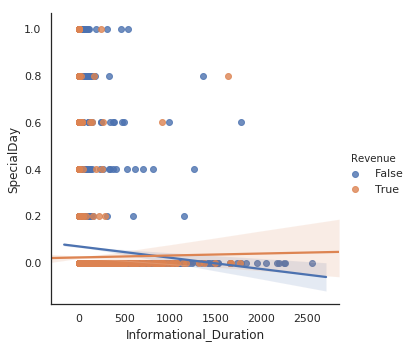

<Figure size 720x432 with 0 Axes>

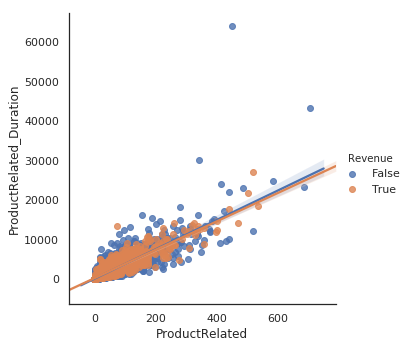

<Figure size 720x432 with 0 Axes>

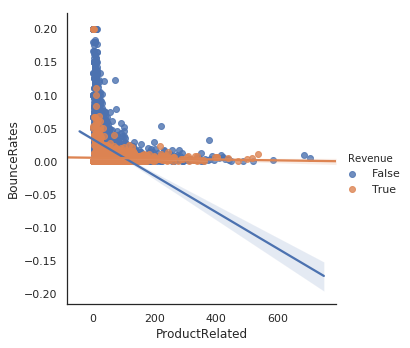

<Figure size 720x432 with 0 Axes>

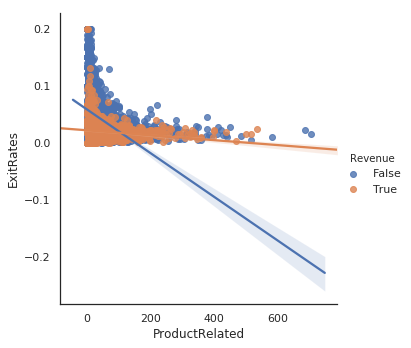

<Figure size 720x432 with 0 Axes>

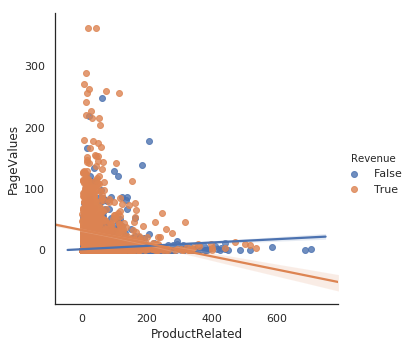

<Figure size 720x432 with 0 Axes>

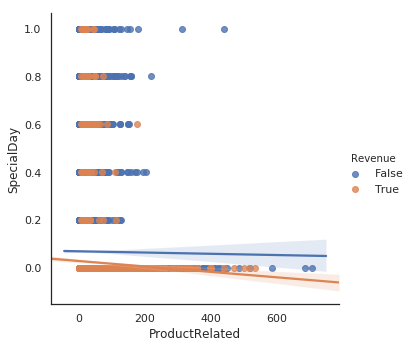

<Figure size 720x432 with 0 Axes>

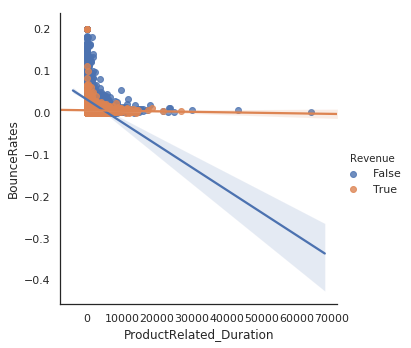

<Figure size 720x432 with 0 Axes>

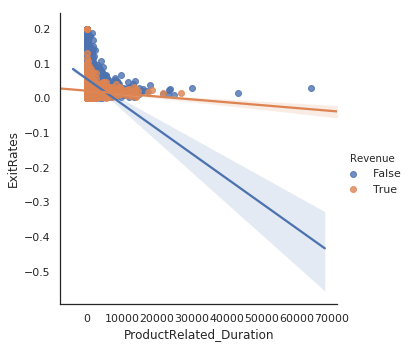

<Figure size 720x432 with 0 Axes>

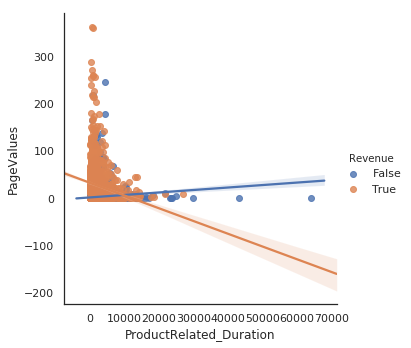

<Figure size 720x432 with 0 Axes>

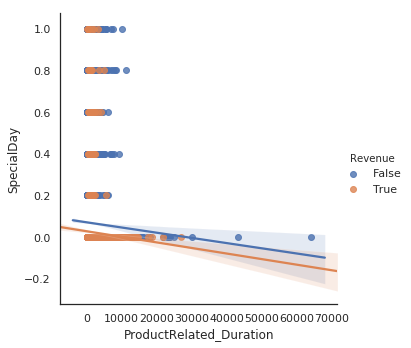

<Figure size 720x432 with 0 Axes>

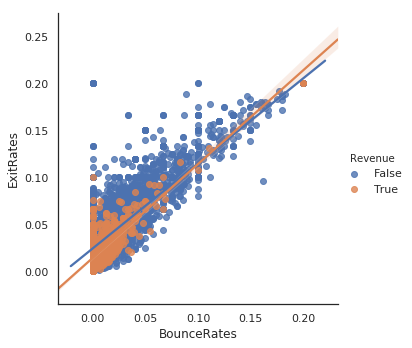

<Figure size 720x432 with 0 Axes>

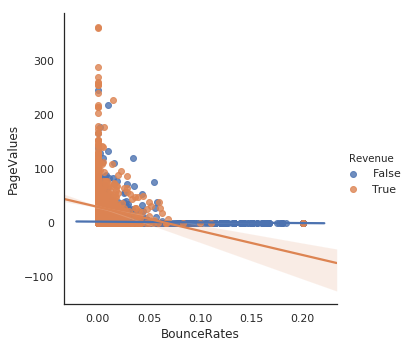

<Figure size 720x432 with 0 Axes>

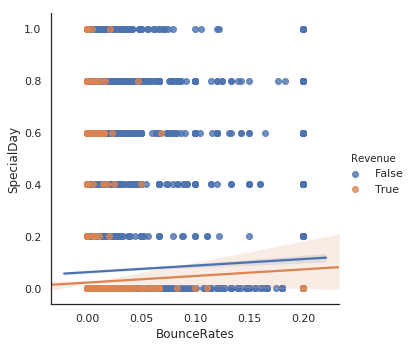

<Figure size 720x432 with 0 Axes>

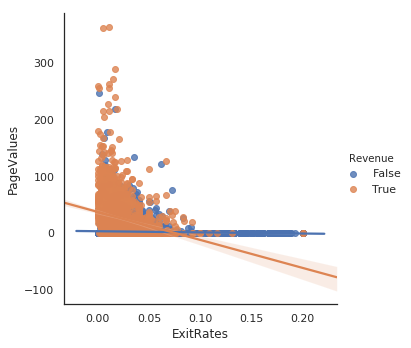

<Figure size 720x432 with 0 Axes>

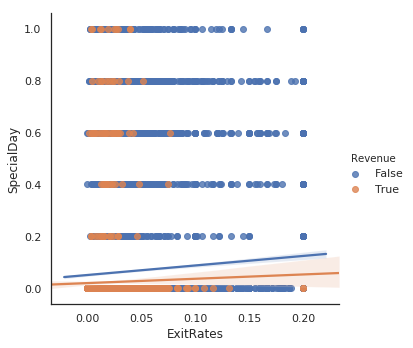

<Figure size 720x432 with 0 Axes>

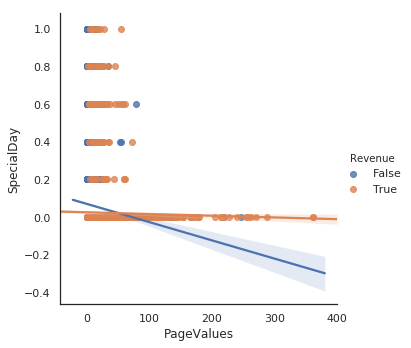

In [201]:
import warnings
warnings.filterwarnings('ignore')

sns.set(style = 'white',font = 'cursive',font_scale = 1)
sns.axes_style({'text.color':2})


n = 1
for i in combinations(numerical_cols,2):
    if n>45 :
        break
    plt.figure(figsize = (10,6))
    sns.lmplot(x = i[0], y=i[1], data = df, hue = 'Revenue')
    plt.show()
    n += 1


1. PageValue vs ExitRates - For revenue True type visitor average PageValues is generally higher and average  exit rates is lower. But for non revenue type visitor average page values is higher and exit rates is lower.
2. Special day vs PageValues -  normally page values of the pages visited by the revenue type are higher than the non revenue type visitor. Also we can see from the scatter plot as any special day approaches page values  gradually reducing for revenue type user, for non revenue type visitor it is more or less same.
3. ExitRates vs ProductRelatedDuration - For revenue type visitors ProductRelated Duration is higher than the non revenue type also exit rate is generally lower for revenue type visitor.
4. ProductRelated vs ProductRelatedDuration - It seems No ofProductRelated pages and ProductRelatedDuration are higher than the non revenue type visistor.
5. BounceRates vs ProductRelated - Looks like Revenue type visitors visits more no of productrelated pages and bounce rate is lower.
6. ExitRates vs ProductRelated - Seems like Pages visited by the Revenue type visitor normally have low average exit rates.


#### Administrative_Duration by Revenue and other categorical

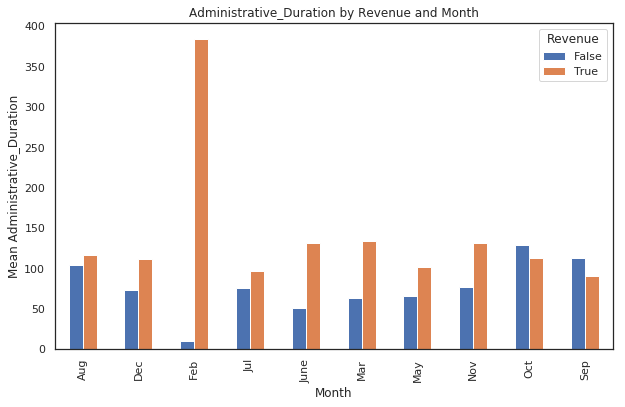

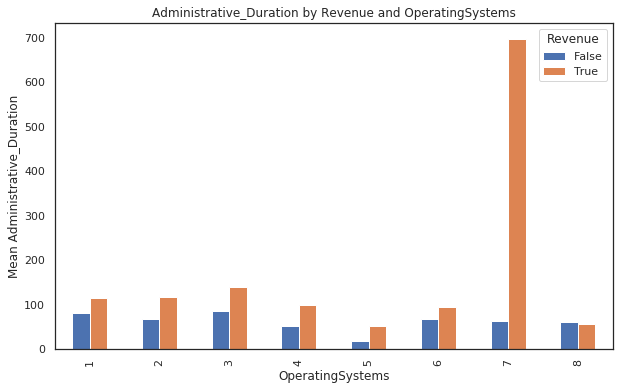

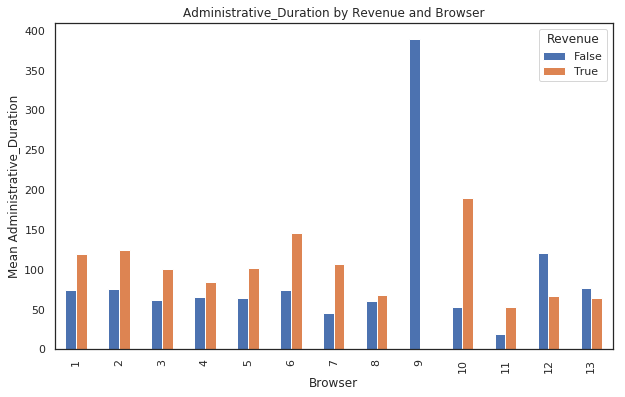

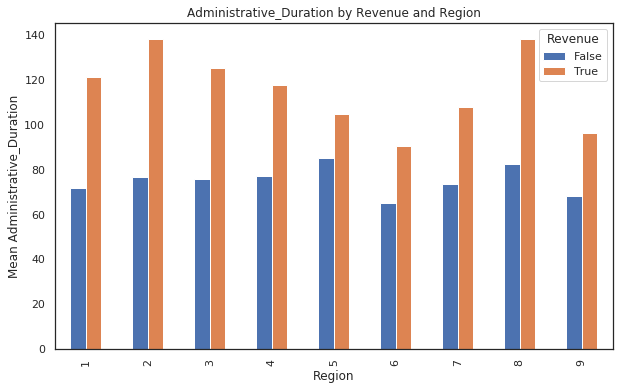

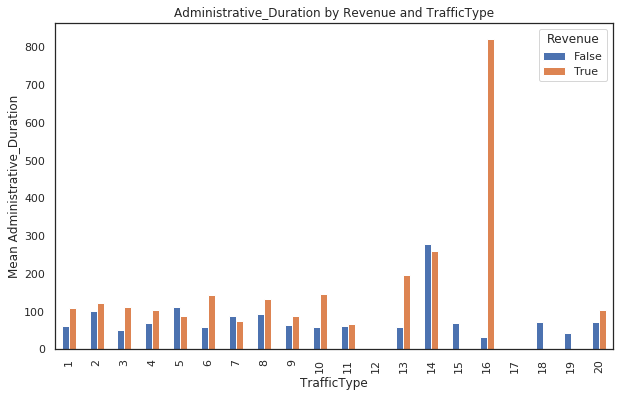

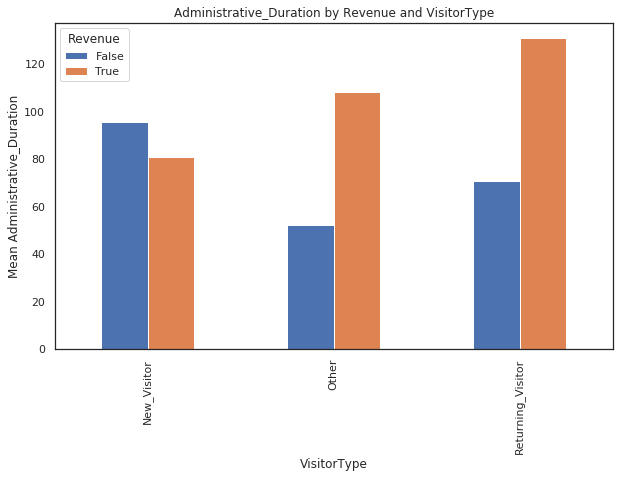

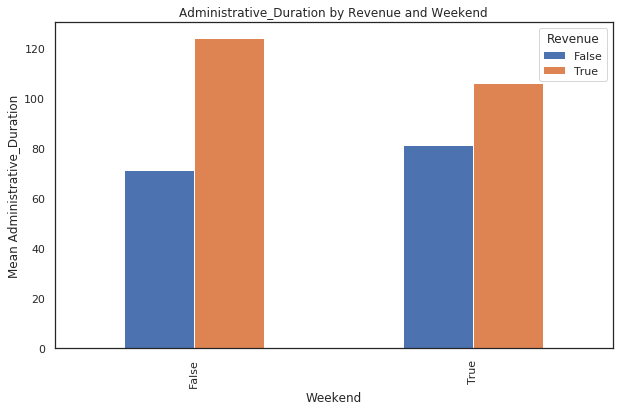

In [221]:
cat_columns = ['Month','OperatingSystems','Browser', 'Region','TrafficType','VisitorType','Weekend']
for i in cat_columns:
    pd.crosstab(df[i], df['Revenue'], values = df['Administrative_Duration'], aggfunc='mean').plot(kind='bar', figsize=(10,6))
    plt.title('Administrative_Duration by Revenue and '+i)
    plt.ylabel('Mean Administrative_Duration')
    plt.show()



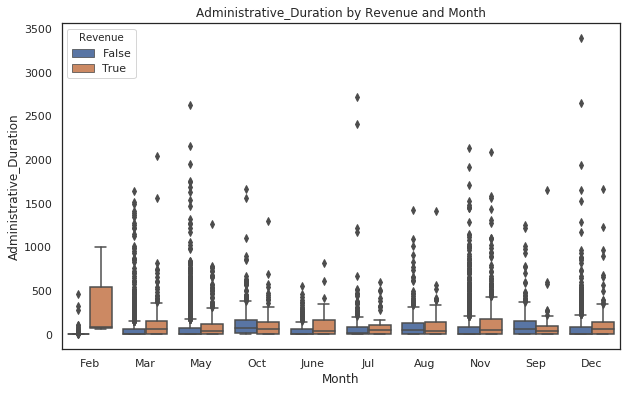

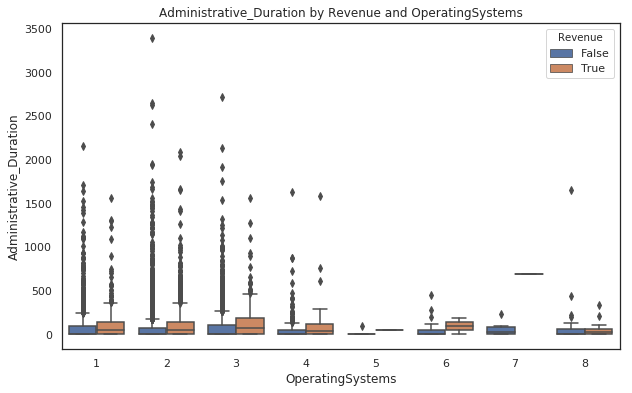

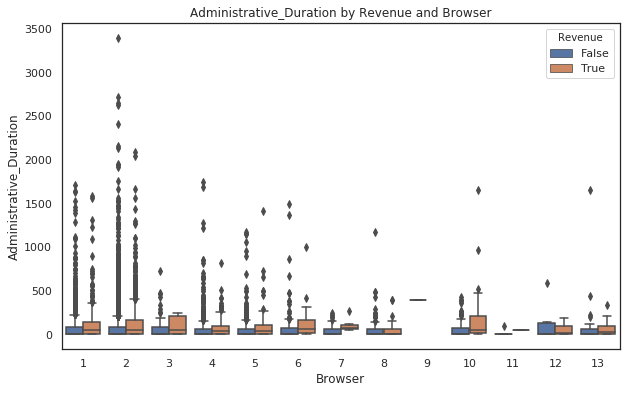

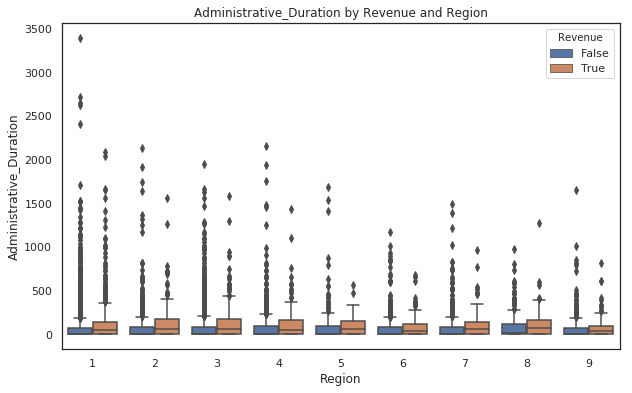

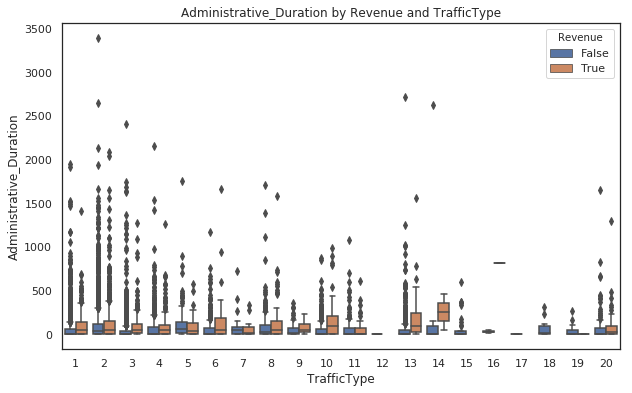

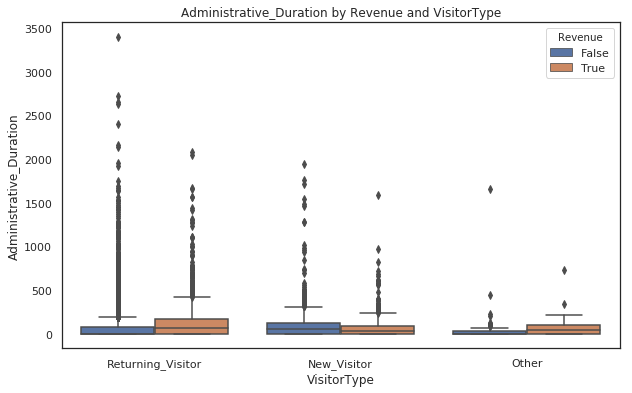

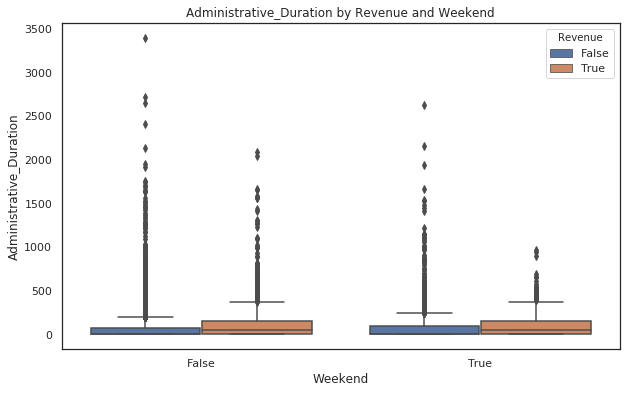

In [228]:
for i in cat_columns:
    plt.figure(figsize = (10,6))
    sns.boxplot(y = 'Administrative_Duration', x = i, data = df, hue = 'Revenue')
    plt.title('Administrative_Duration by Revenue and '+i)
    plt.show()

1. In month of February Mean Administrative_duration for True Revenue Category is higher than rest of the months and also for False Revenue category mean Administrative_Duration is vey less compared to other months.
2. Mean Administrative_Duration for operating system 7 and True Revenue type mean is very high compared to other operating system because there is only one value present in the dataset for this category which is having very high Administrative_Duration. For other operating system it looks like mean Administrative_Duration for Revenue Category  is almost similar. So we can see from here also Mean Administrative_Duration is generally higher for True Revenue type.
3. Mean Administrative_Duration for Revenue category is generally higher for all types of browser except type 9 browser. This is because there is only one user who use the type 9 browser and Administrative_Duration for that user is above 390.
4. For every Region Mean Administrative_Duration is normally higher for Revenue category. From the side-by-side boxplot also we can see all the boxplots for True Revenue Type and False Revenue Type looks similar.
5. Normally Mean Administrative_Duration is higher for Revenue Type for any Traffic Type except 14, 15, 18, 19 traffictype. But for traffictype 16 True revenue category is having the higher Mean Administrative_Duration comapred to other traffic type.
6. Mean Administrative_Duration True Revenue and New_visitor category is low whereas for other visitor type this mean is higher is True Revenue category.
7. In both Weekend and Weekdays Mean Administrative_Duration is lower for Non Revenue Category and for Revenue category it is high.

#### Informational_Duration by Revenue and other categorical feature

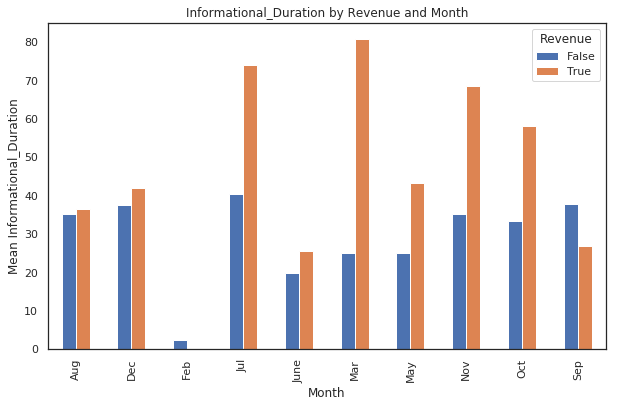

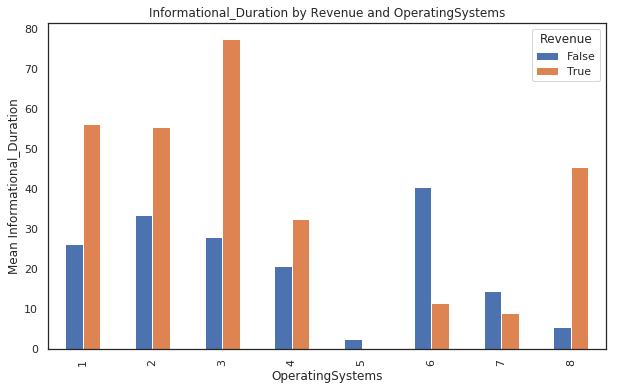

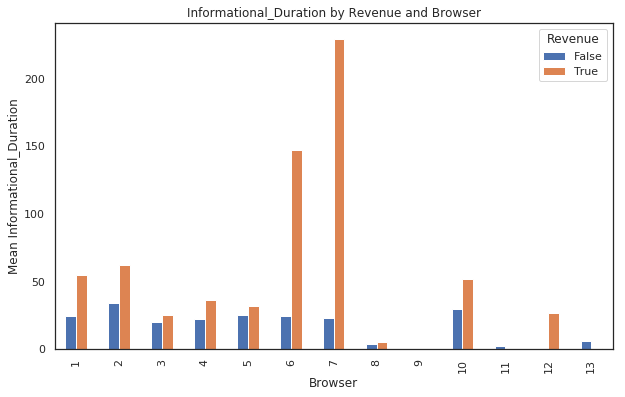

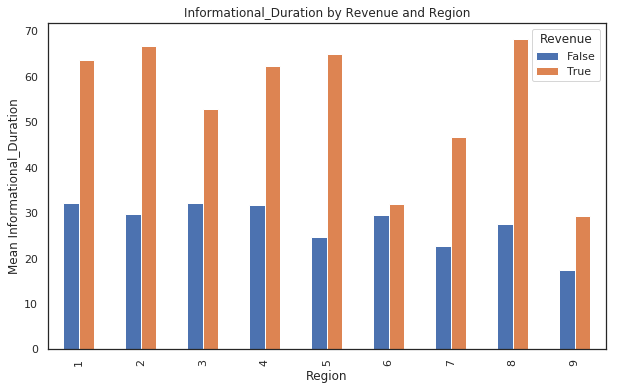

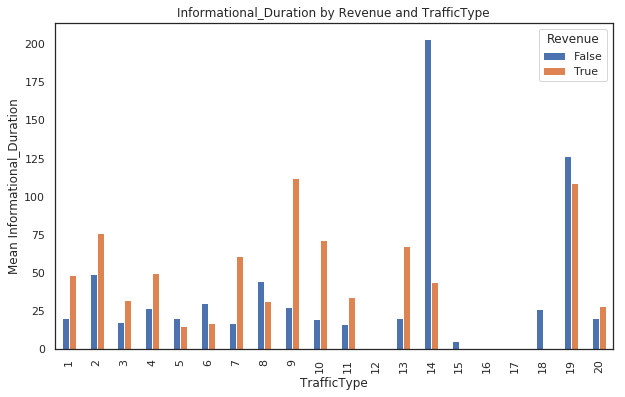

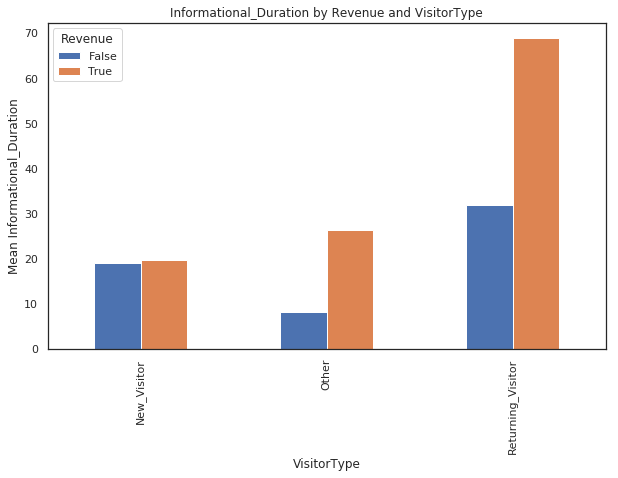

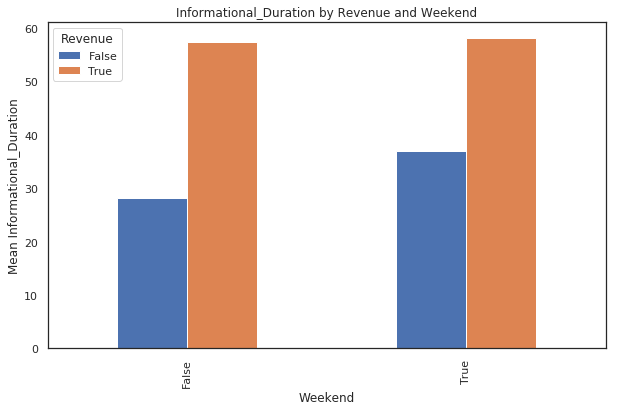

In [227]:
for i in cat_columns:
   
    pd.crosstab(df[i], df['Revenue'], values = df['Informational_Duration'], aggfunc='mean').plot(kind='bar', figsize = (10,6))
    plt.title('Informational_Duration by Revenue and '+i)
    plt.ylabel('Mean Informational_Duration')

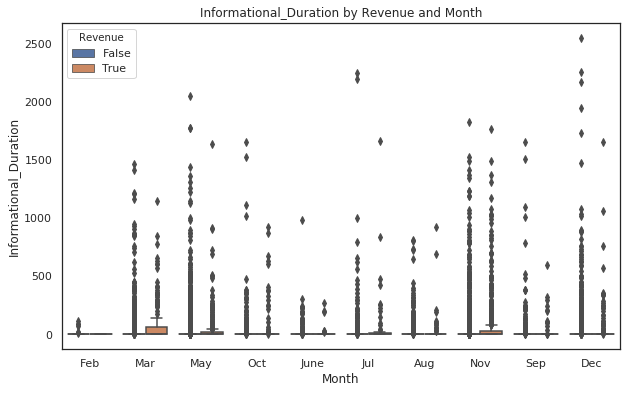

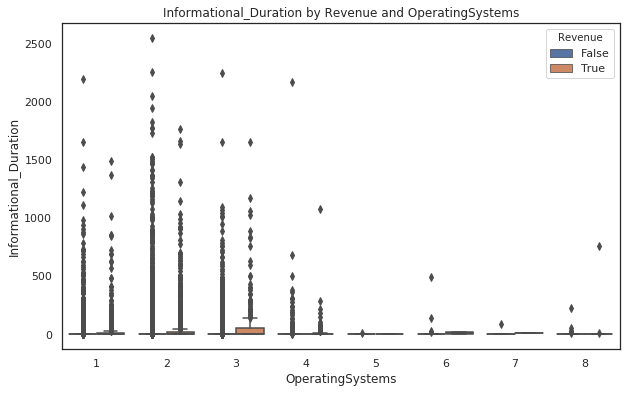

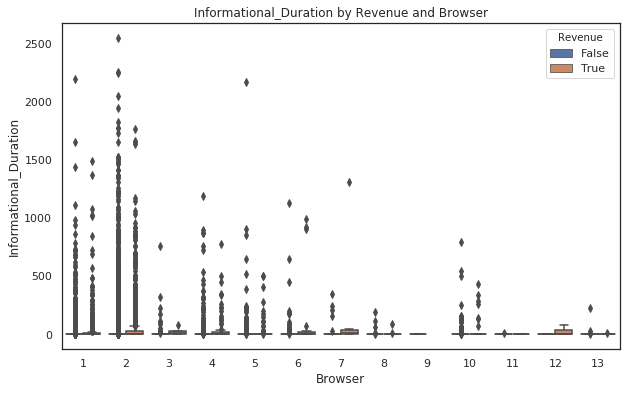

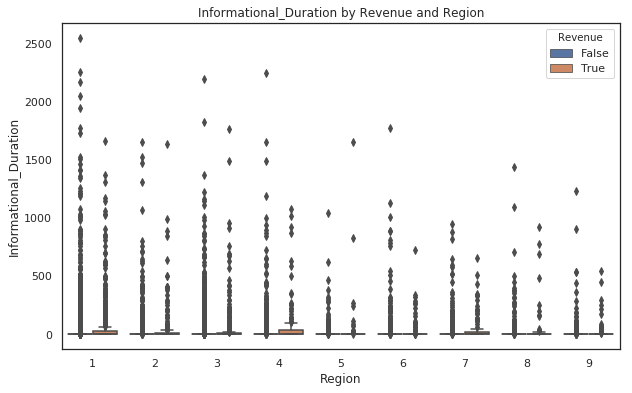

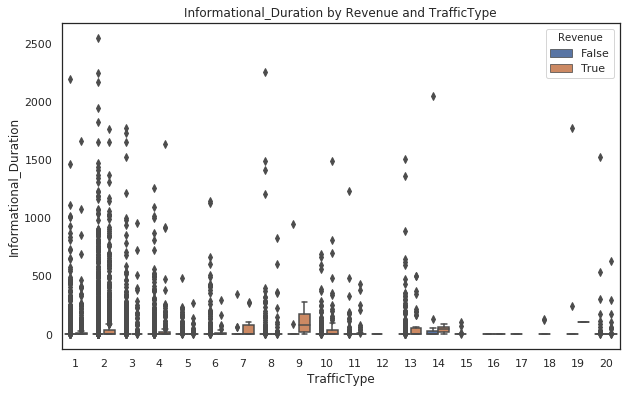

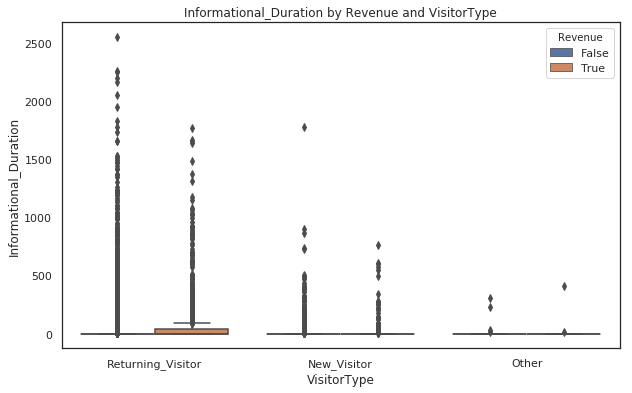

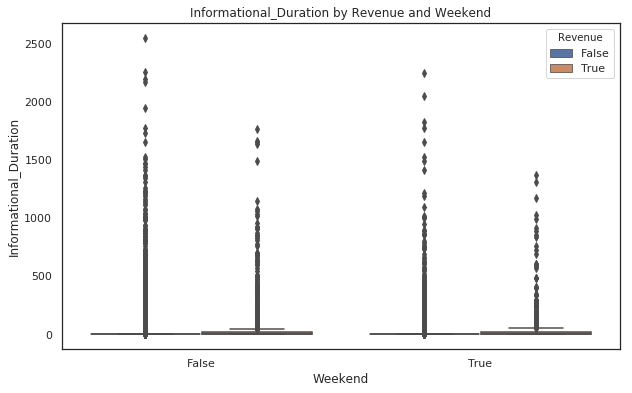

In [231]:
for i in cat_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(y = 'Informational_Duration', x = i, data = df, hue = 'Revenue')
    plt.title('Informational_Duration by Revenue and '+i)
    plt.show()

1. Normally in each month for Revenue Category Mean Informational_Duration is generally higher except September and February.
2. For operating system 1,2,3,4 and 8 in case of True Revenue category Mean Informational_Duration is higher than the non revenue category. For other operating system  this is reversed this is because of the extreme values as we can see from the boxplots.
3. For most of the browser type Mean Informational_Duration is generally higher for True Revenue category. For browser type 7 it is highest. For 9th browser type There is only one entry  for False revenue category and informational duration is 0 and there is no entry for True revenue category for browser type 9 so both the cases mean informational_Duration is 0.
4. For each region Mean Informational_Duration is normally higher for True Revenue category and Non Revenue it is lower.
5. For Traffic type 1,2,3,4,7,9,10,11,,13,20 Meean Informational_Duration is higher for True Revenue Type. For traffic type 5,6,8,14,15,18 and 19 Mean Informational_Duration is higher for False Revenue type. In traffic type 14 it looks like Non revenue type is having an enormusly high mean informational duration this is because a single extreme value of Informational Duration as we can see from the boxplot and also number of records are small. There is only one record for 17 type. For 16 type there is 3 records(1 for revenue 2 for Non revenue) all are having 0 informational_duration
6. Mean informational_duration is normally higher for True Revenue category for each visitor type.
7. In both weekdays and weekends False revenue category are having less mean informationla_duration and True revenue category is having high mean informational_duration.

#### ProdctRelated_Duration by Revenue and other categorical columns

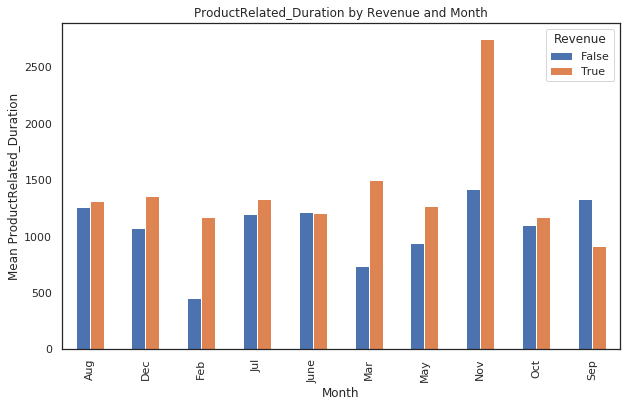

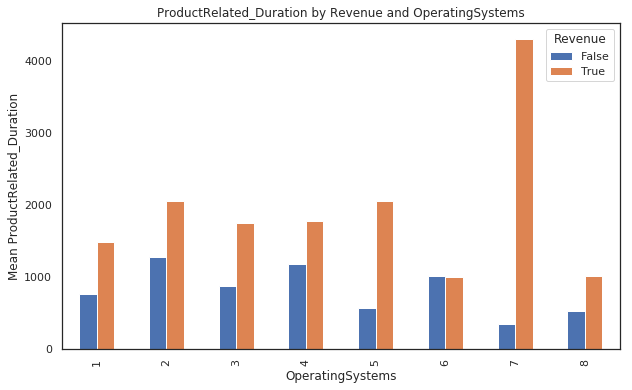

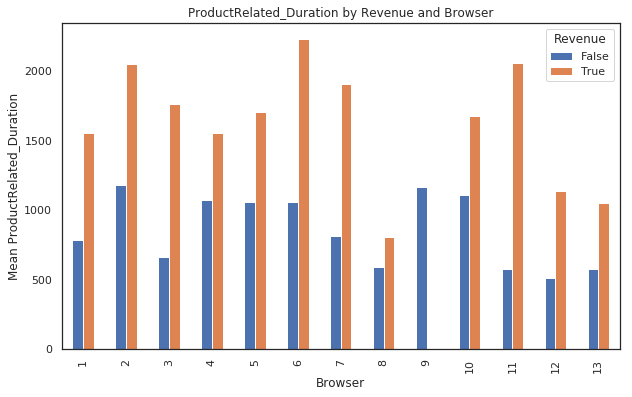

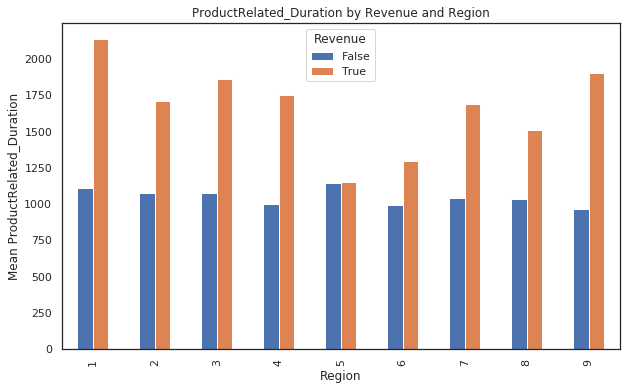

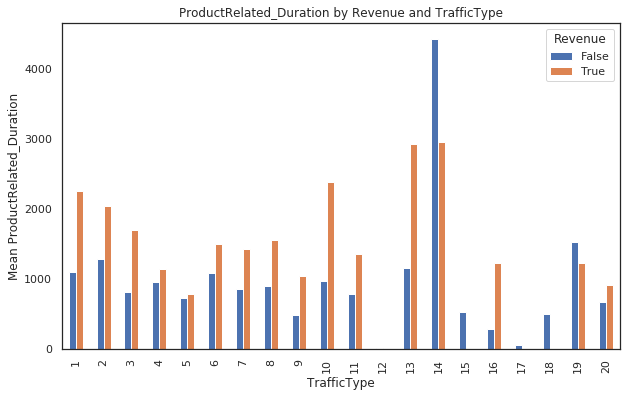

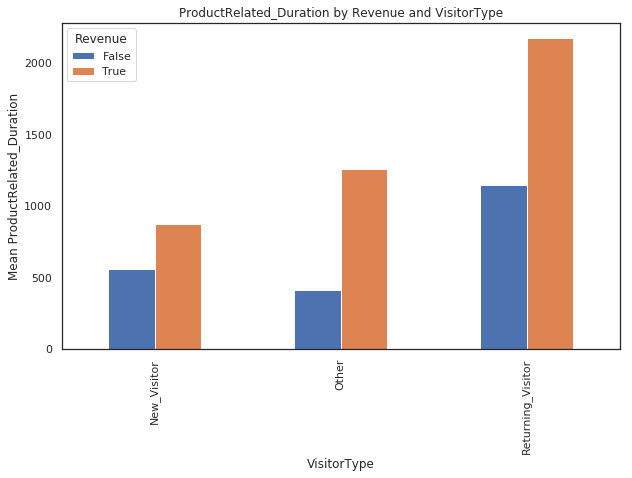

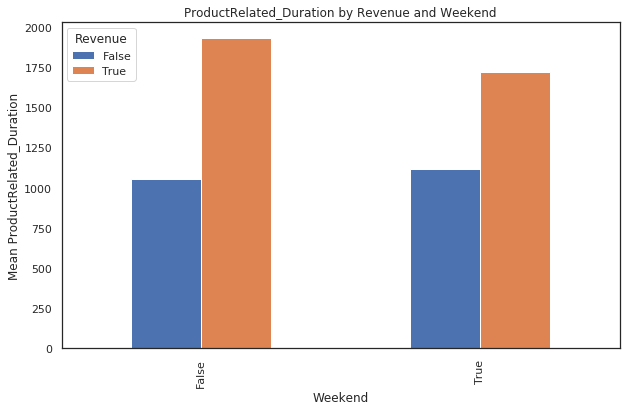

In [250]:
for i in cat_columns:
   
    pd.crosstab(df[i], df['Revenue'], values = df['ProductRelated_Duration'], aggfunc='mean').plot(kind='bar', figsize = (10,6))
    plt.title('ProductRelated_Duration by Revenue and '+i)
    plt.ylabel('Mean ProductRelated_Duration')

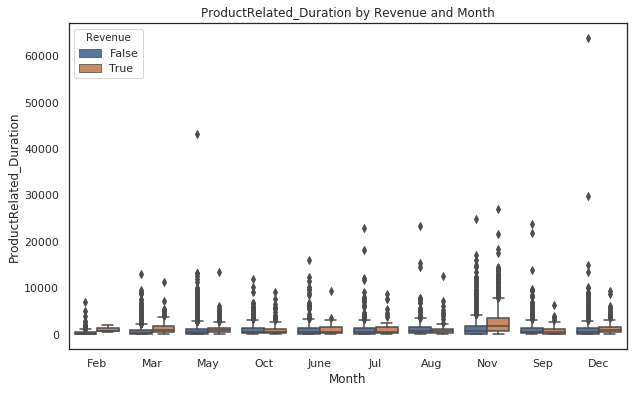

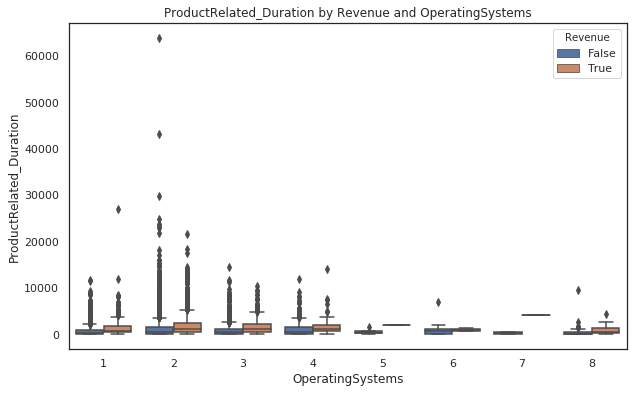

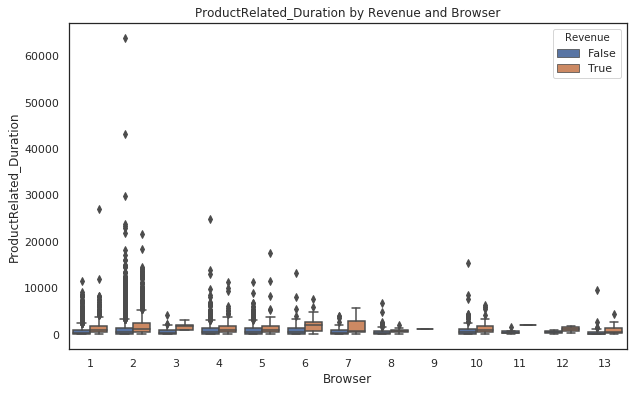

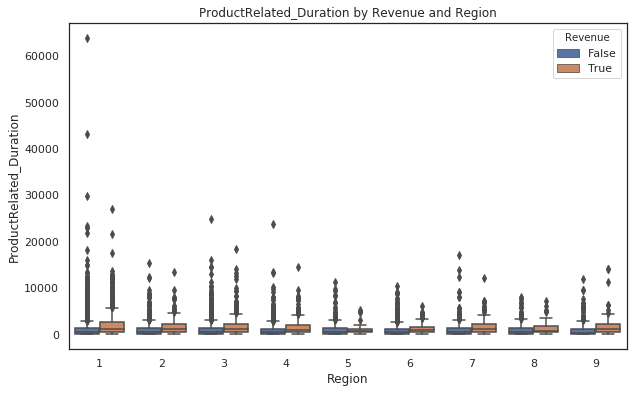

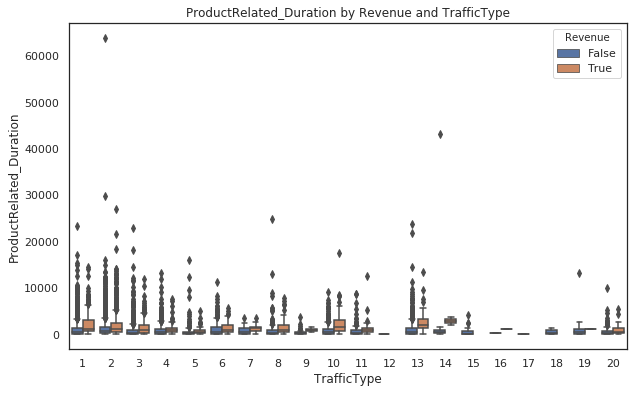

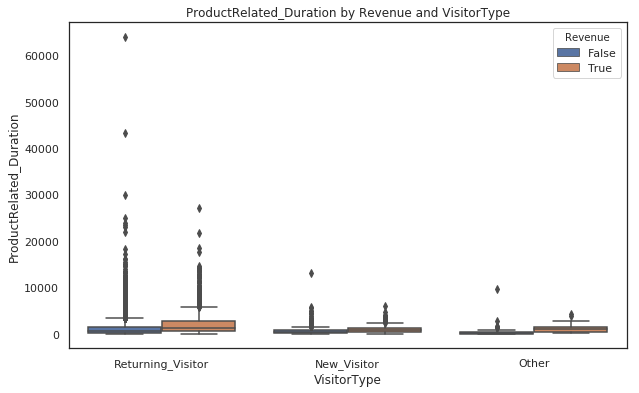

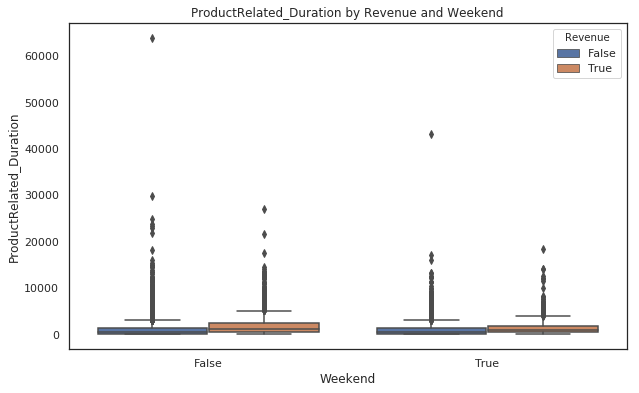

In [252]:
for i in cat_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(y = 'ProductRelated_Duration', x = i, data = df, hue = 'Revenue')
    plt.title('ProductRelated_Duration by Revenue and '+i)
    plt.show()

1. For every month Mean ProductRelated_Duration for True Revenue category is higher than false revenue category except September(because of an extreme value for False revenue category).
2. For every operating system except operating system 6 True Revnue category has higher Mean productrelated_duration than the false revenue category. In case of oprating system 6 mean productrelated_duration for non revenue type is slightly higher because of a single extreme value.
3. For every browser type Mean ProductRelated_Duration is higher for True Revenue category except browser type 9(because there is only 1 record for a user who used browser type 9 and Product related duration is almost 1170 seconds.)
4. For different regions Mean ProductRelated_Duration is lower for Non revenue type and higher for True Revenue type.
5. Mean ProductRelated-Duration is normally higher for True revenue type for almost every traffic type except 14, 15, 17, 18, 19(because of either there is no record for True Revenue type or there is one or two extreme value present in the False Revenue type)
6. For all the visitortype category True Revenue is having higher Mean ProductRelated_Duration then Flase Revenue category.
7. For both weekend and weekdays Mean ProductRelated Duration is higher for True Revenue Category.

#### BounceRates by Revenue and other categorical features

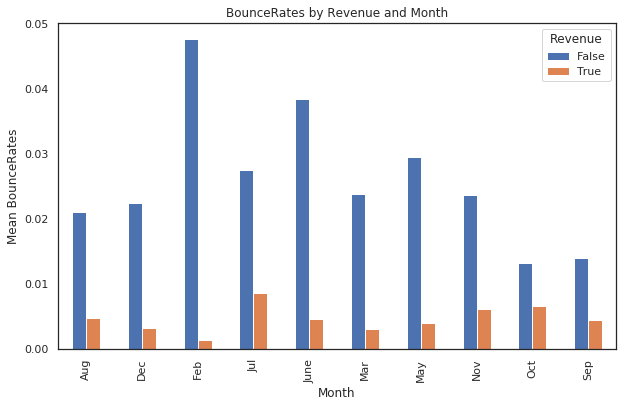

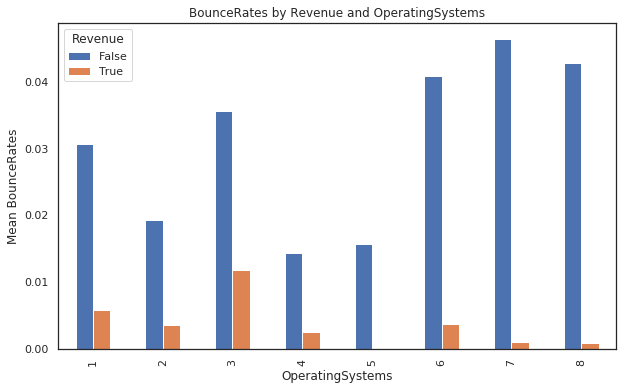

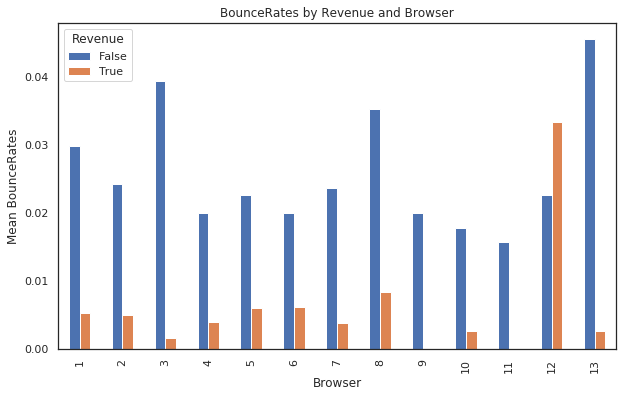

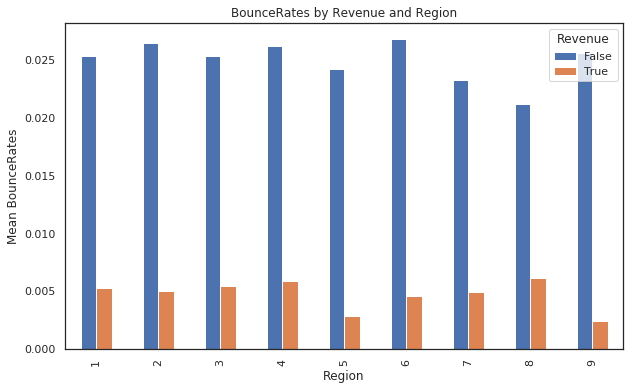

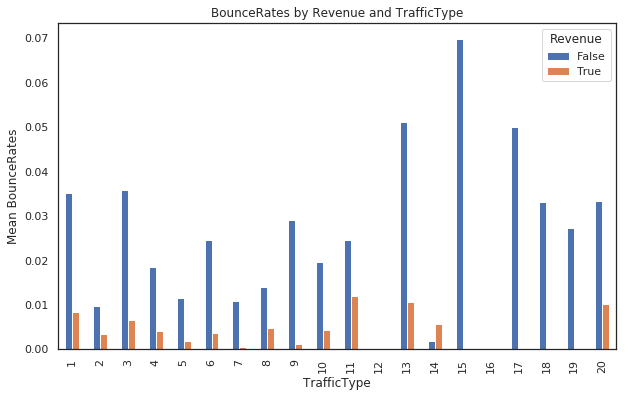

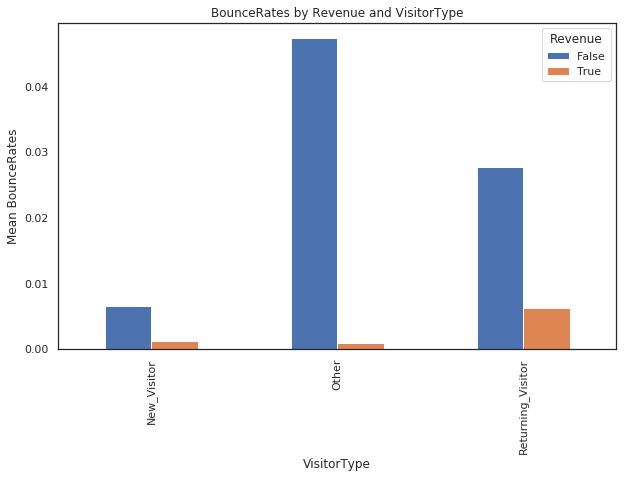

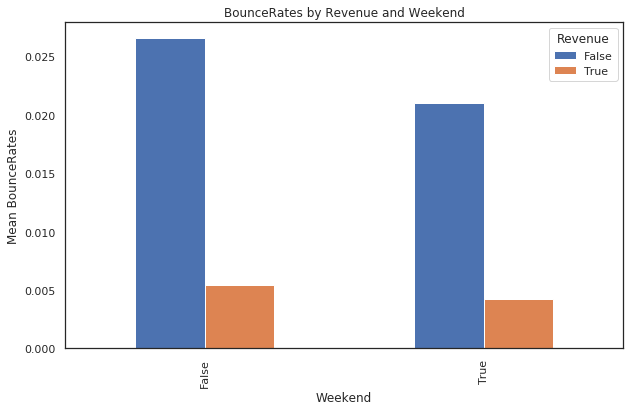

In [254]:
for i in cat_columns:
    pd.crosstab(df[i], df['Revenue'], values = df['BounceRates'], aggfunc='mean').plot(kind='bar', figsize = (10,6))
    plt.title('BounceRates by Revenue and '+i)
    plt.ylabel('Mean BounceRates')

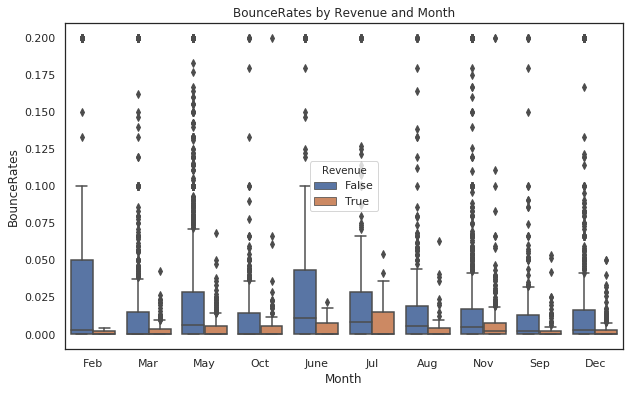

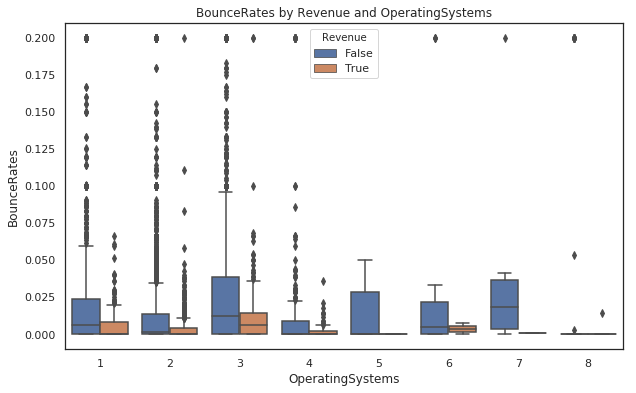

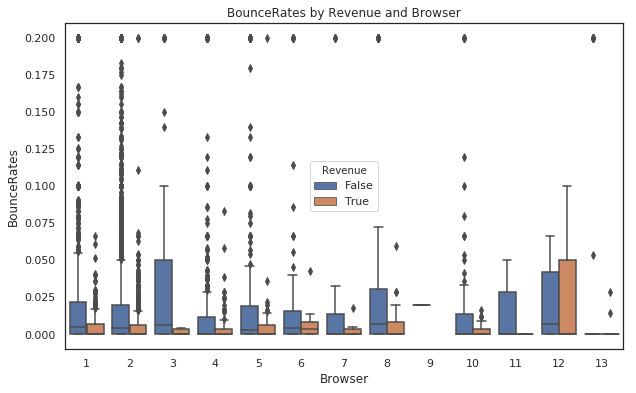

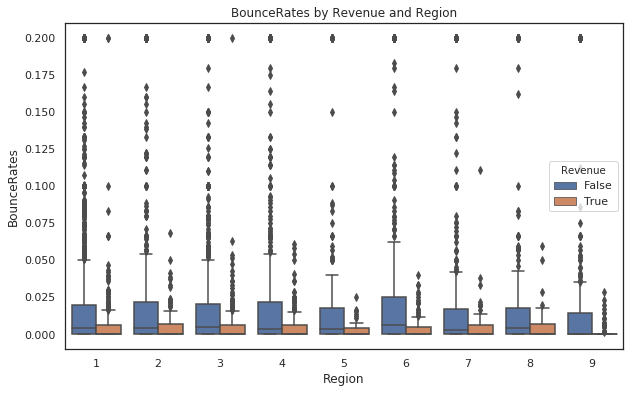

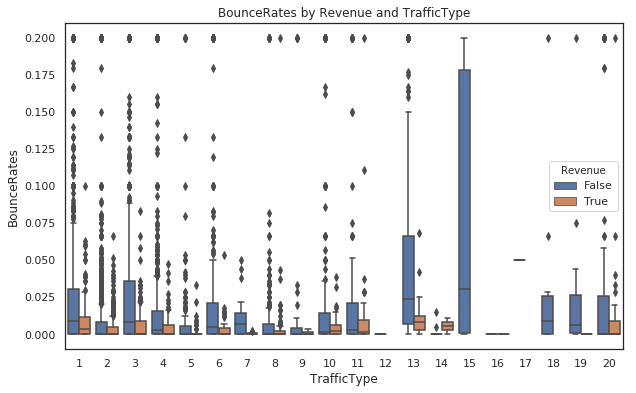

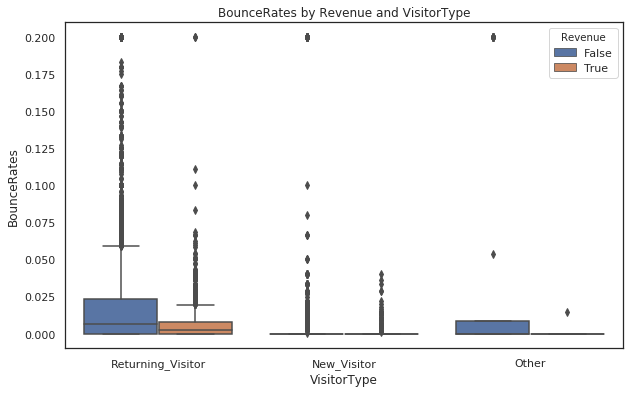

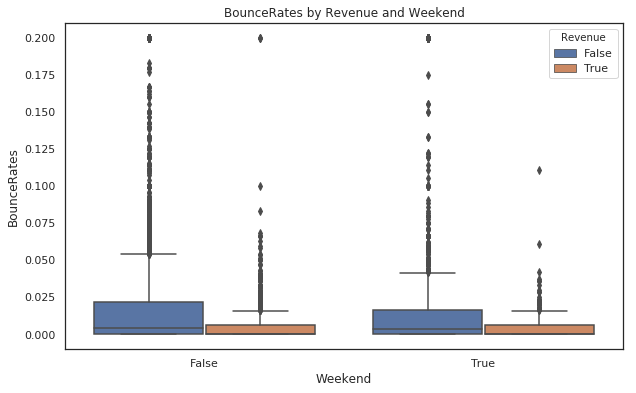

In [255]:
for i in cat_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(y = 'BounceRates', x = i, data = df, hue = 'Revenue')
    plt.title('BounceRates by Revenue and '+i)
    plt.show()

1. Most the month we can see BounceRates is higher for non revenue type than the revenue type. In Feb bounce rate is highest for False revenue category as we can see from the boxplot values are more variable in this case(especially last 50% values after median) and extreme values are also there whereas for Revenue type value range is so small and no extreme value is also there.
2. For all the operating sysytem category Mean BounceRates is higher for True Revenue type. For operating system 5 the mean bouncerates is 0 for True Revenue cause there is only one record for this type and the bounce rate for this was 0.
3. For almost all the browser type Mean BounceRates is higher for False Revenue category. As we have seen earlier there is only one record with browser type 9 which has bounce rates almost 0.02, for this reason The mean looks for this category is considerably large and the mean BounceRates is 0 for True Revenue category. For browser type 12 mean for the True Revenue type is higher because of the variability of the values of BounceRates(50% values are 0 but 50% values are more variable which is pulling the mean towards the higher side)
4. for all the regions mean BounceRates is higher for False Revenue Category. As we can see from boxplots also variability is more for false Revenue category.
5. Mean BounceRates is normally higher for False Revenue for almost every traffic type. 
6. For every visitor type Mean Bounce rate is higher for False Revenue category than the True Revenue Category.
7. For both the weekends and weekends mean bounce rate is higher for False Revenuue category.

* So normally for True Revenue category bounce rates is lower.

#### ExitRates by Revenue and other categorical columns

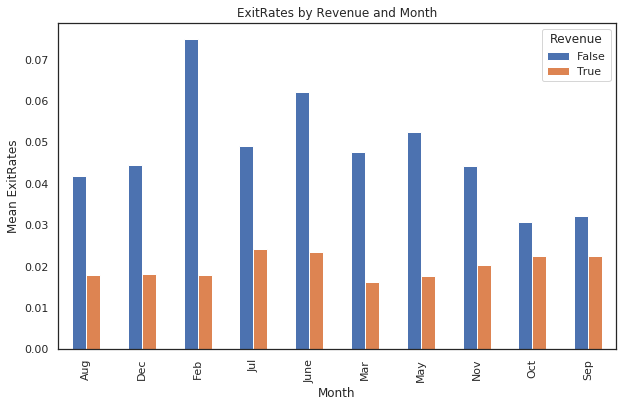

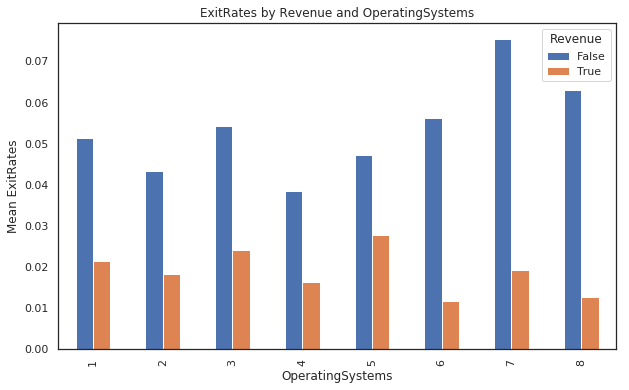

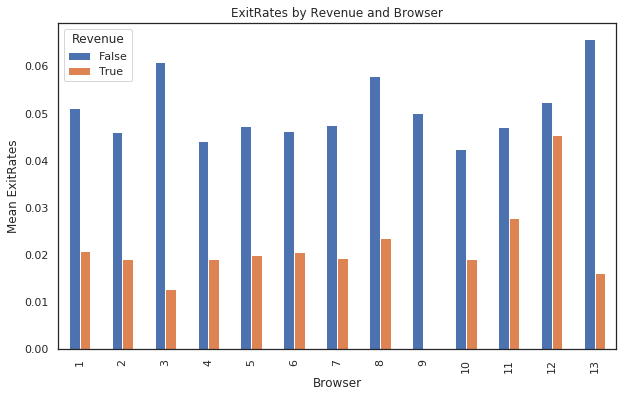

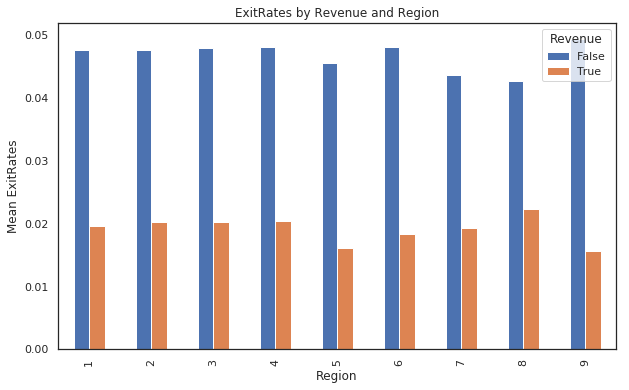

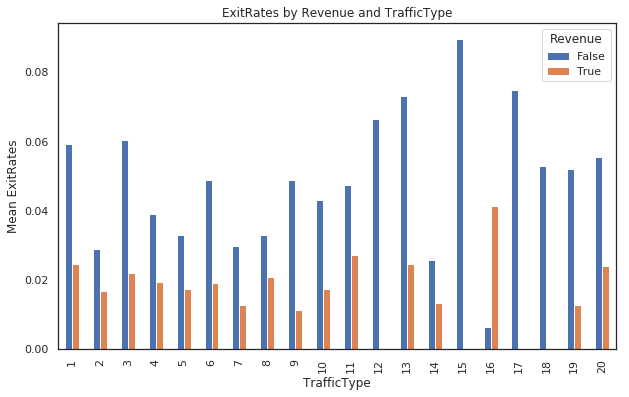

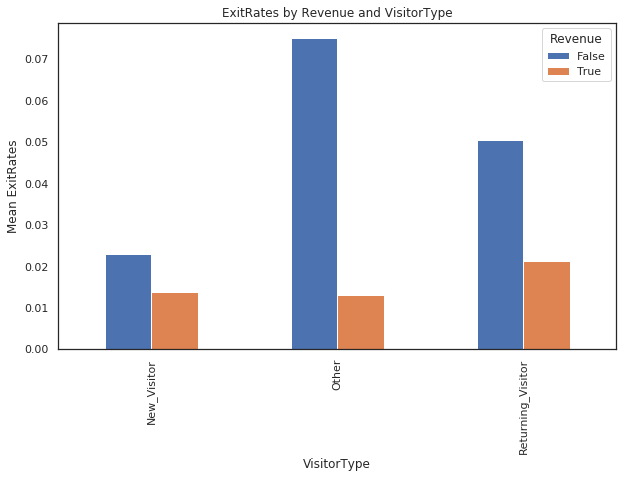

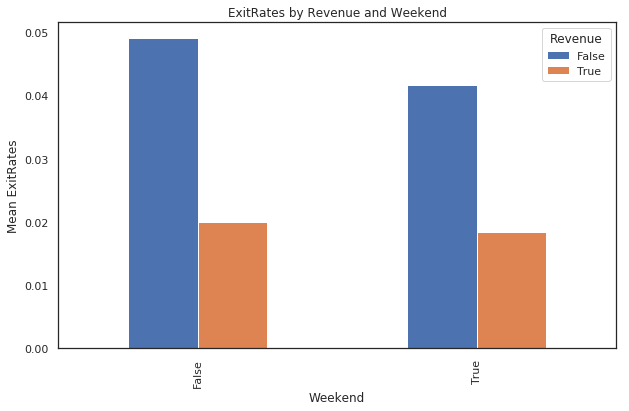

In [258]:
for i in cat_columns:
    pd.crosstab(df[i], df['Revenue'], values = df['ExitRates'], aggfunc='mean').plot(kind='bar', figsize = (10,6))
    plt.title('ExitRates by Revenue and '+i)
    plt.ylabel('Mean ExitRates')

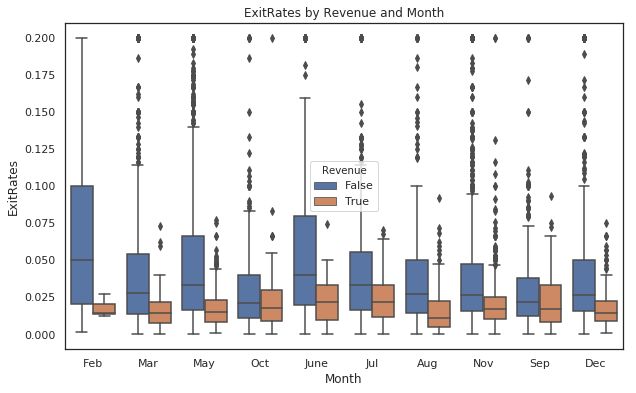

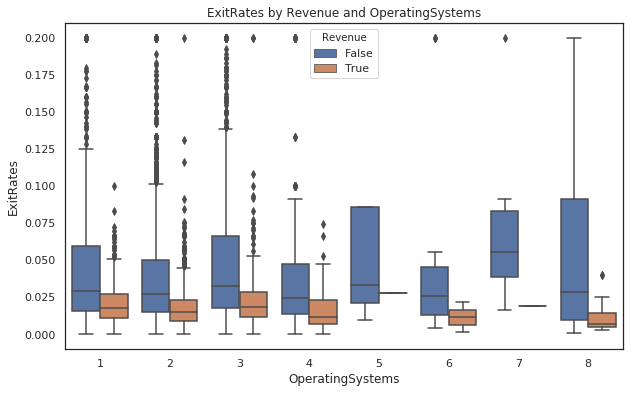

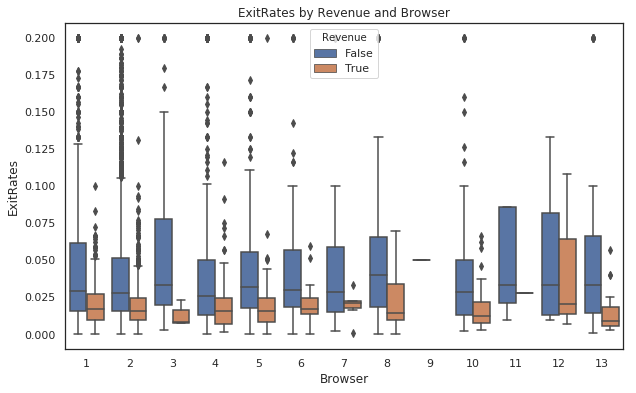

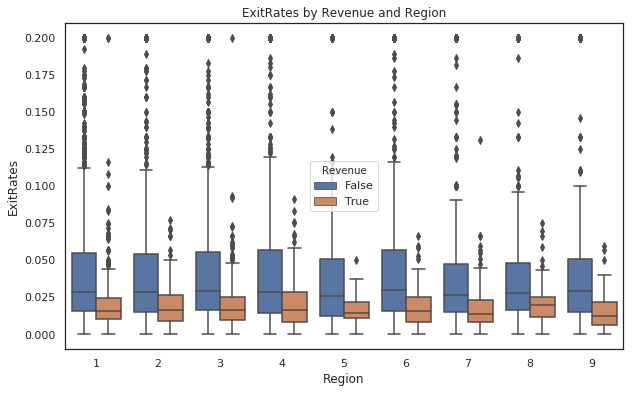

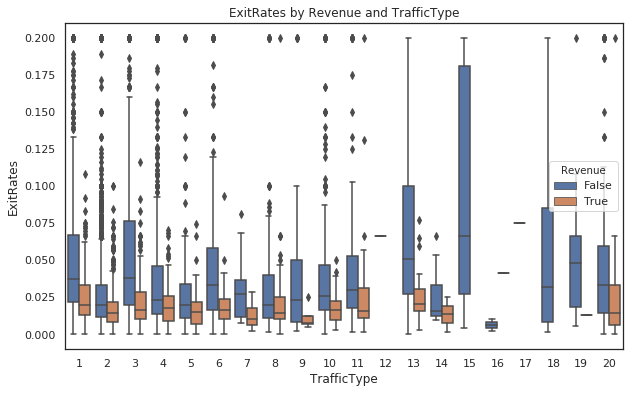

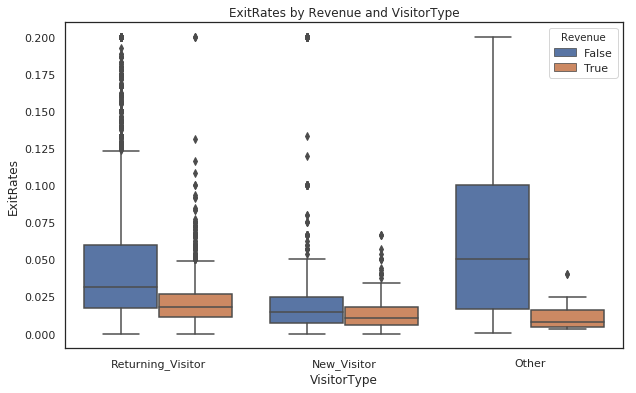

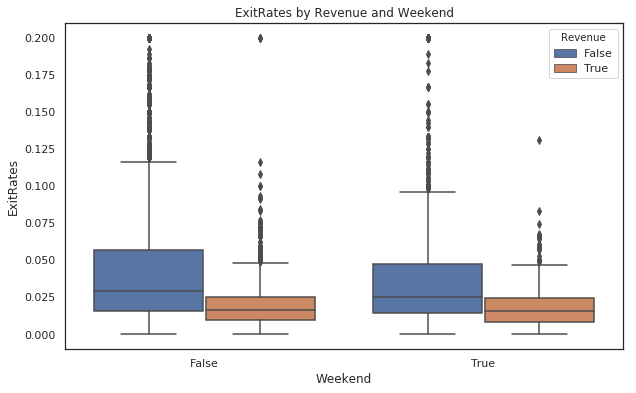

In [259]:
for i in cat_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(y = 'ExitRates', x = i, data = df, hue = 'Revenue')
    plt.title('ExitRates by Revenue and '+i)
    plt.show()

1. For every month mean ExitRates is normally higher fro False Revenue category. Also from the boxplots we can see that for every month False Revenue category is having the ExitRates values highly variable whereas for  True Revenue category these EcitRates values are very less variable than the False Revenue category.
2. For every operating systems type mean of ExitRates is higher for False Revenue category and also from the boxplots we can check that variabiliy of values of ExitRates is higher for False revenue category for different operating systems.
3. For All the browsers mean ExitRates are higher for False Revenue category. For browser type 9 there is only one record(False Revenue type)as we know from earlier analysis and ExitRate is higher for this record which is making the mean higher.
4.  For all the Regions mean ExitRates are higher for False Revenue category.
5. For the all the traffic type except 16 the False Revenue category is higher. In TrafficType 16 from the boxplot we can see for false revenue category all the values are on lower side, therefore mean is also less, but in True Revenue there is only one record, which have the higher value of ExitRates, that is why mean is higher.
6. For all the visitor type Mean Exit rates is higher for False Revenue category than the True Revenue category.
7. Irrespective of weekdays or weekends False Revenue category is having higher mean ExitRtaes the True Revenue category.
8. So on an average we can say for False Revenue type visitors generally visits the page with higher exitrates than the non revenue type.


#### PageValues by Revenue and other Categorical columns

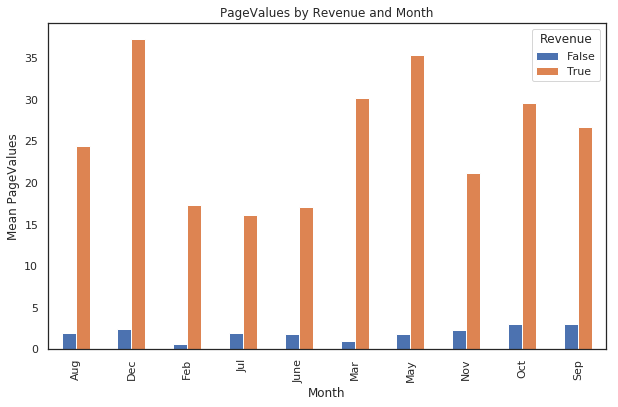

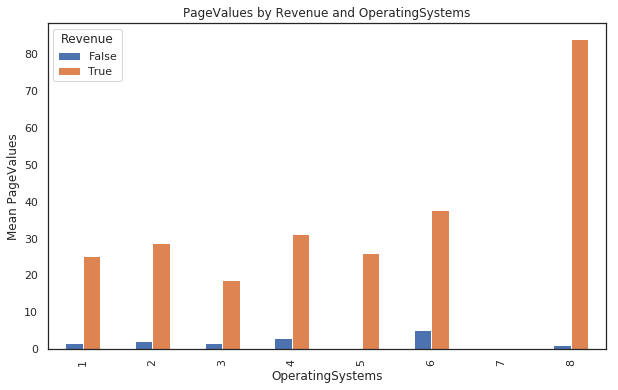

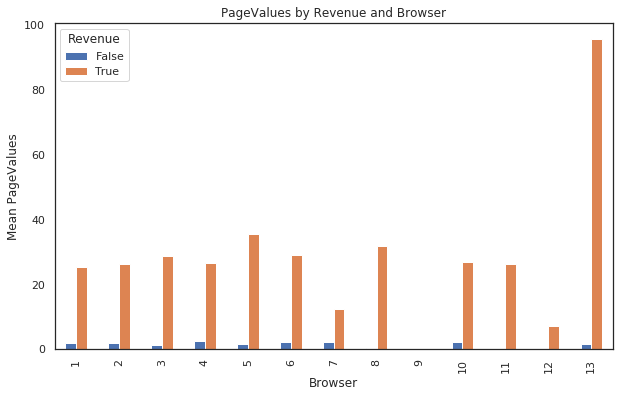

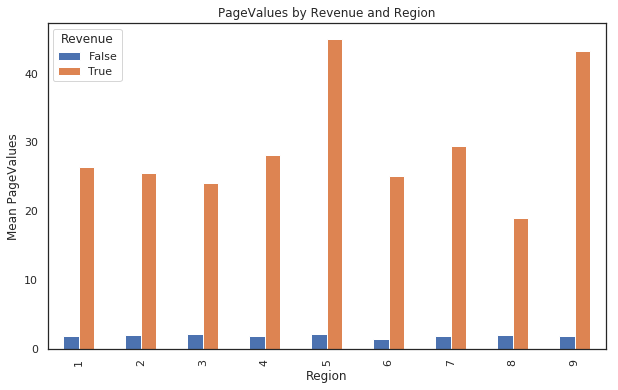

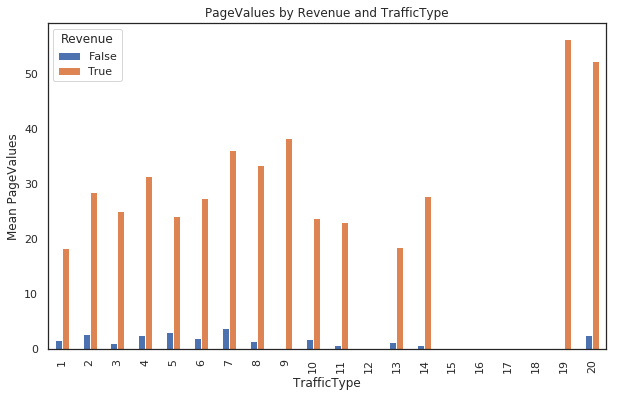

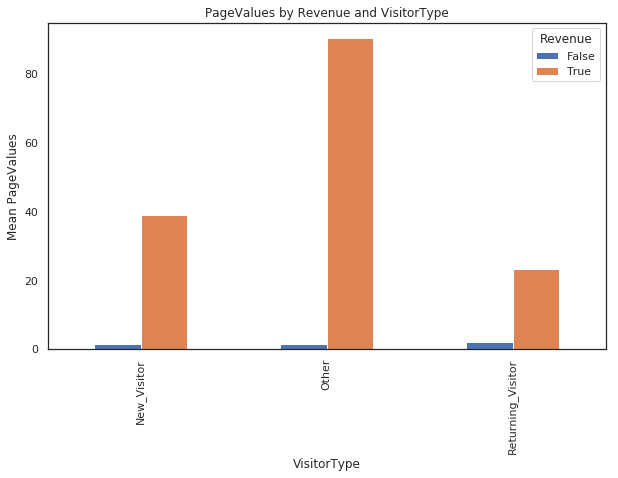

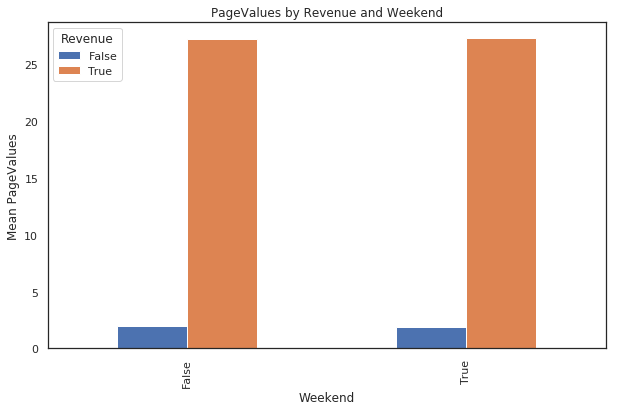

In [261]:
for i in cat_columns:
    pd.crosstab(df[i], df['Revenue'], values = df['PageValues'], aggfunc='mean').plot(kind='bar', figsize = (10,6))
    plt.title('PageValues by Revenue and '+i)
    plt.ylabel('Mean PageValues')

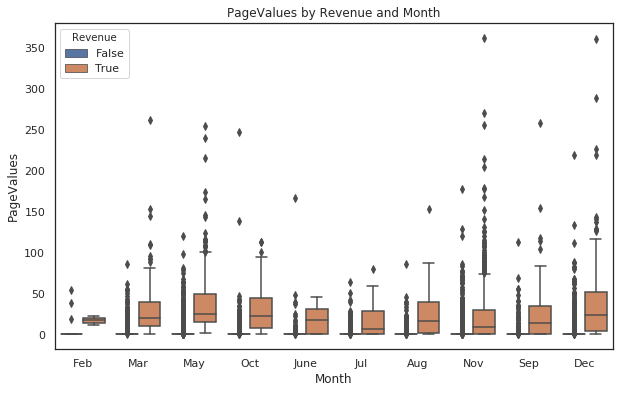

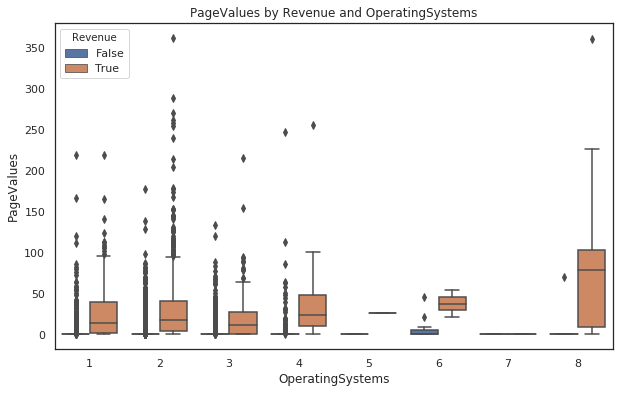

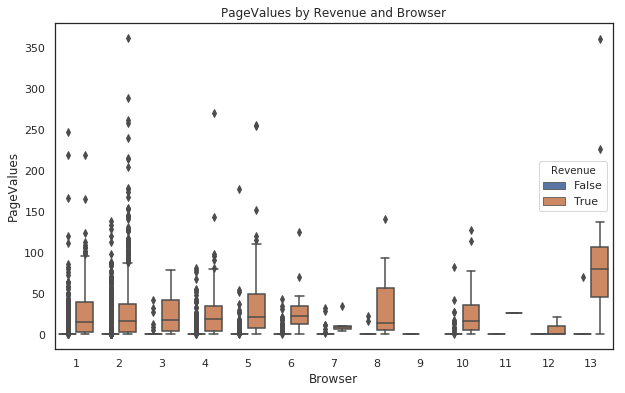

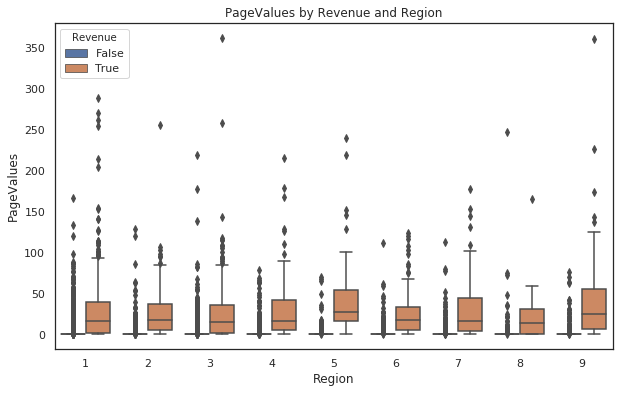

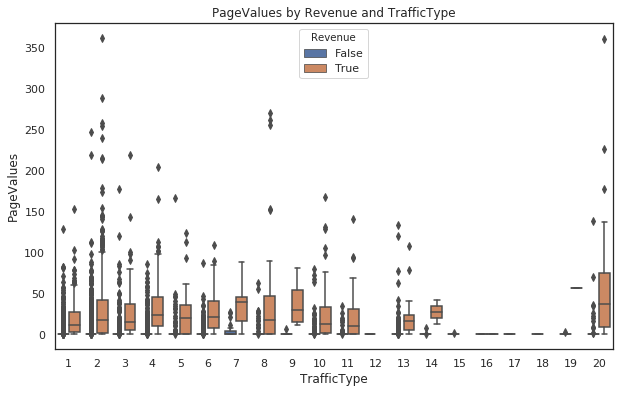

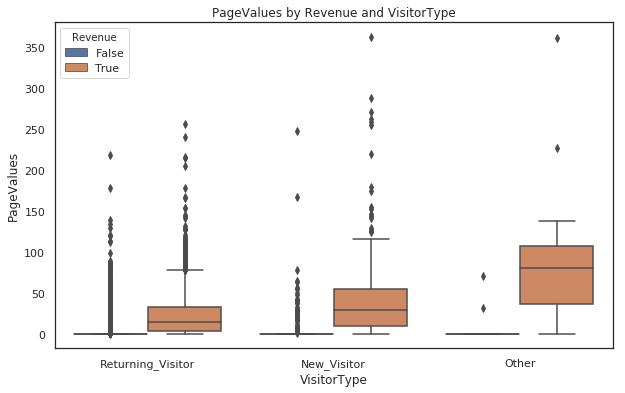

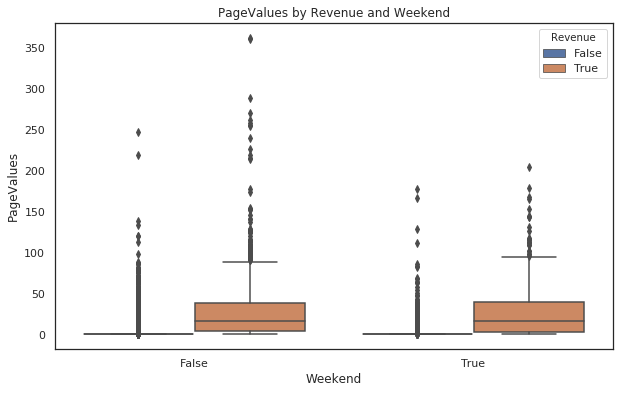

In [262]:
for i in cat_columns:
    plt.figure(figsize=(10,6))
    sns.boxplot(y = 'PageValues', x = i, data = df, hue = 'Revenue')
    plt.title('PageValues by Revenue and '+i)
    plt.show()

From all the bar plots and Boxplots it can be seen that irrespective or any other categorical feature True Revenue Category has higher Mean PageValues and also the variability is more compared to False Revenue category. For almost 80% values of the PageValues for False Revenue type is 0 so the mean is less.